# <span style="color:black">Capstone Project - HDB Resale Prices and Predictions </span>

## Methodology


### 1. Planning Analytics
    1.1 Data Collection
    1.2 Data Cleansing
    1.3 Data Understanding
    
### 2. Descriptive & Diagnostics Analytics
    2.1 Exploratory Data Analysis
    2.2 Data Formatting 
    2.3 Mapping Visualization of HDB Resale Flats with Geolocation Data
    
### 3. Predictive Analytics
    3.1 Building Data Models
    3.2 Testing Data Models
    3.3 Predictions       

In [2]:
#Importing of the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        
from matplotlib.ticker import FixedLocator
import seaborn as sns
from datetime import datetime as dt
import scipy.stats as stats

**Core Data**  
1.1 Past HDB Resales Transactions (from Jan 2017 to Nov 2024)
> Source - CSV file from Singapore Government Data Portal (https://data.gov.sg/) 

**Other Data**  
1.2 Amenities (Schools, MRT/LRT, Malls) - geolocation
> Source - from public domain (https://www.onemap.gov.sg)

1.3 Economic (Consumer Price Index)
> Source - csv file from Singapore Department of Statistics (https://www.singstat.gov.sg/find-data/search-by-theme/economy/prices-and-price-indices/latest-data)

# 1.1 Data Collection

In [6]:
#Load and display the loaded dataset
hdb_data = pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
display(hdb_data)

month        town  flat_type block        street_name storey_range  \
0       2017-01  ANG MO KIO     2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1       2017-01  ANG MO KIO     3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2       2017-01  ANG MO KIO     3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3       2017-01  ANG MO KIO     3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4       2017-01  ANG MO KIO     3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
...         ...         ...        ...   ...                ...          ...   
197007  2024-12      YISHUN  EXECUTIVE   392       YISHUN AVE 6     10 TO 12   
197008  2024-12      YISHUN  EXECUTIVE   792     YISHUN RING RD     01 TO 03   
197009  2024-12      YISHUN  EXECUTIVE   604       YISHUN ST 61     01 TO 03   
197010  2024-12      YISHUN  EXECUTIVE   834       YISHUN ST 81     07 TO 09   
197011  2024-12      YISHUN  EXECUTIVE   828       YISHUN ST 81     07 TO 09   

        floor_area_sqm      flat_model  lease_commence_date  \
0                 44.0        Improved                 1979   
1                 67.0  New Generation                 1978   
2                 67.0  New Generation                 1980   
3                 68.0  New Generation                 1980   
4                 67.0  New Generation                 1980   
...                ...             ...                  ...   
197007           142.0       Apartment                 1988   
197008           142.0       Apartment                 1987   
197009           164.0       Apartment                 1992   
197010           142.0       Apartment                 1988   
197011           146.0      Maisonette                 1988   

           remaining_lease  resale_price  
0       61 years 04 months      232000.0  
1       60 years 07 months      250000.0  
2       62 years 05 months      262000.0  
3        62 years 01 month      265000.0  
4       62 years 05 months      265000.0  
...                    ...           ...  
197007  62 years 07 months      860000.0  
197008  61 years 10 months      830000.0  
197009  66 years 07 months      950000.0  
197010  62 years 03 months      950000.0  
197011  62 years 03 months      990000.0  

[197012 rows x 11 columns]

In [8]:
#Size of the dataset
hdb_data.shape # 11 columns and 197,012 rows

(197012, 11)

In [10]:
#Overall info of the dataset
hdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197012 entries, 0 to 197011
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                197012 non-null  object 
 1   town                 197012 non-null  object 
 2   flat_type            197012 non-null  object 
 3   block                197012 non-null  object 
 4   street_name          197012 non-null  object 
 5   storey_range         197012 non-null  object 
 6   floor_area_sqm       197012 non-null  float64
 7   flat_model           197012 non-null  object 
 8   lease_commence_date  197012 non-null  int64  
 9   remaining_lease      197012 non-null  object 
 10  resale_price         197012 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.5+ MB


In [12]:
#Descriptive statistics of the dataset
hdb_data.describe()

floor_area_sqm  lease_commence_date  resale_price
count   197012.000000        197012.000000  1.970120e+05
mean        97.006394          1996.190339  5.081551e+05
std         24.030687            14.147983  1.777381e+05
min         31.000000          1966.000000  1.400000e+05
25%         82.000000          1985.000000  3.770000e+05
50%         93.000000          1996.000000  4.780000e+05
75%        112.000000          2011.000000  6.080000e+05
max        366.700000          2021.000000  1.588000e+06

# 1.2 Data Transformation/Cleansing

In [14]:
# Convert the month from Dtype <object> to <datetime64>
hdb_data['month'] = pd.to_datetime(hdb_data['month'])

In [16]:
# Convert remaining_lease from Dtype <object> to <int64>
def getYears(text):
    if isinstance(text, str):
        yearmonth = [int(s) for s in text.split() if s.isdigit()]
        if len(yearmonth) > 1:  # if there's year and month
            years = yearmonth[0] + (yearmonth[1] / 12)
        else:  # if only year
            years = yearmonth[0]
        return years
    else:  # if int
        return text

# Apply the conversion function
hdb_data['remaining_lease'] = hdb_data['remaining_lease'].apply(lambda x: getYears(x))
# Convert to integer
hdb_data['remaining_lease'] = hdb_data['remaining_lease'].astype(np.int64)

display(hdb_data.head())

month        town flat_type block        street_name storey_range  \
0 2017-01-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1 2017-01-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2 2017-01-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3 2017-01-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4 2017-01-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date  remaining_lease  \
0            44.0        Improved                 1979               61   
1            67.0  New Generation                 1978               60   
2            67.0  New Generation                 1980               62   
3            68.0  New Generation                 1980               62   
4            67.0  New Generation                 1980               62   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3      265000.0  
4      265000.0

In [18]:
#Rename lease_commence_date to lease_commence_year
hdb_data.rename(columns={'lease_commence_date':'lease_commence_year'}, inplace = True)
hdb_data.head()

month        town flat_type block        street_name storey_range  \
0 2017-01-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1 2017-01-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2 2017-01-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3 2017-01-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4 2017-01-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_year  remaining_lease  \
0            44.0        Improved                 1979               61   
1            67.0  New Generation                 1978               60   
2            67.0  New Generation                 1980               62   
3            68.0  New Generation                 1980               62   
4            67.0  New Generation                 1980               62   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3      265000.0  
4      265000.0

In [20]:
#Check for missing data
total_null = hdb_data.isnull().sum()
total_null

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_year    0
remaining_lease        0
resale_price           0
dtype: int64

# 1.3 Data Understanding

In [23]:
#Check that the data is correct
hdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197012 entries, 0 to 197011
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                197012 non-null  datetime64[ns]
 1   town                 197012 non-null  object        
 2   flat_type            197012 non-null  object        
 3   block                197012 non-null  object        
 4   street_name          197012 non-null  object        
 5   storey_range         197012 non-null  object        
 6   floor_area_sqm       197012 non-null  float64       
 7   flat_model           197012 non-null  object        
 8   lease_commence_year  197012 non-null  int64         
 9   remaining_lease      197012 non-null  int64         
 10  resale_price         197012 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 16.5+ MB


In [25]:
hdb_data.describe()

month  floor_area_sqm  lease_commence_year  \
count                         197012   197012.000000        197012.000000   
mean   2021-03-15 18:24:17.746736384       97.006394          1996.190339   
min              2017-01-01 00:00:00       31.000000          1966.000000   
25%              2019-05-01 00:00:00       82.000000          1985.000000   
50%              2021-05-01 00:00:00       93.000000          1996.000000   
75%              2023-02-01 00:00:00      112.000000          2011.000000   
max              2024-12-01 00:00:00      366.700000          2021.000000   
std                              NaN       24.030687            14.147983   

       remaining_lease  resale_price  
count    197012.000000  1.970120e+05  
mean         74.019857  5.081551e+05  
min          40.000000  1.400000e+05  
25%          62.000000  3.770000e+05  
50%          74.000000  4.780000e+05  
75%          88.000000  6.080000e+05  
max          97.000000  1.588000e+06  
std          14.065754  1.777381e+05

#### 1. Town

>The “town” column is the housing regions segmented by HDB. There are a total of 26 towns inside the dataset.
>The highest number of resale transactions of 16,252 is Sengkang and the lowest number of resale transactions of 488 is Bukit Timah.

In [28]:
hdb_data['town'].value_counts()

town
SENGKANG           16252
PUNGGOL            14621
WOODLANDS          14003
YISHUN             13435
TAMPINES           13228
JURONG WEST        13064
BEDOK              10354
HOUGANG             9910
CHOA CHU KANG       8998
ANG MO KIO          8094
BUKIT BATOK         7918
BUKIT MERAH         7540
BUKIT PANJANG       7161
TOA PAYOH           6145
KALLANG/WHAMPOA     6001
PASIR RIS           5760
SEMBAWANG           5527
QUEENSTOWN          5404
GEYLANG             4853
CLEMENTI            4388
JURONG EAST         4032
SERANGOON           3553
BISHAN              3513
CENTRAL AREA        1565
MARINE PARADE       1205
BUKIT TIMAH          488
Name: count, dtype: int64

#### 2. Flat Type
>The ‘flat_type’ column is the types of HDB flats. There are total of 7 different types of HDB flats with the 4 room being the most popular of having the resale transactions of 83,258. The reason could be it is ideally for households of 4-7 people.

In [31]:
hdb_data['flat_type'].value_counts()

flat_type
4 ROOM              83258
5 ROOM              48733
3 ROOM              46733
EXECUTIVE           14465
2 ROOM               3667
MULTI-GENERATION       80
1 ROOM                 76
Name: count, dtype: int64

#### 3. Block
>'Block' is the block number of a resale HDB unit. There is 2728 different block numbers in this dataset. To know where the HDB unit is located, it is combined with the street name to form an address where the unit is located.

In [34]:
hdb_data['block'].value_counts()

block
2       599
1       561
8       556
9       531
101     509
       ... 
795A      1
226F      1
858B      1
496F      1
860A      1
Name: count, Length: 2728, dtype: int64

#### 4. Street Name
>'Street_name' is the name of the street where a resale HDB unit is located. There are 571 different street names in this dataset.

In [37]:
hdb_data['street_name'].value_counts()

street_name
YISHUN RING RD        2846
PUNGGOL DR            2155
BEDOK RESERVOIR RD    2078
PUNGGOL FIELD         1937
ANG MO KIO AVE 10     1884
                      ... 
SEMBAWANG WAY            5
GEYLANG EAST AVE 2       2
MARINE PARADE CTRL       1
ALJUNIED AVE 2           1
ALKAFF CRES              1
Name: count, Length: 571, dtype: int64

#### 5. Storey Range
>'Storey_range' is the level of a building where the unit is located. There are a total of 17 different storey ranges in the dataset. Normally the higher-storey unit gets more higher value than lower-storey unit. We can check if this relationship is true for this dataset.

In [40]:
hdb_data['storey_range'].value_counts()

storey_range
04 TO 06    45286
07 TO 09    41335
10 TO 12    36716
01 TO 03    34830
13 TO 15    18941
16 TO 18     8852
19 TO 21     3808
22 TO 24     2669
25 TO 27     1644
28 TO 30     1068
31 TO 33      577
34 TO 36      521
37 TO 39      435
40 TO 42      207
43 TO 45       61
46 TO 48       45
49 TO 51       17
Name: count, dtype: int64

#### 6. Floor Area SQM
>'Floor_area_sqm' is the floor size of a resale HDB unit measured in square metres. The smallest flat sold was 31 square metres. The largest flat re-sold was 366.7 square metres and the average size of a resale flat was 97 square metres. Normally larger units are higher valued than smaller units. We can check this relationship to true for this dataset.

In [43]:
hdb_data['floor_area_sqm'].describe()

count    197012.000000
mean         97.006394
std          24.030687
min          31.000000
25%          82.000000
50%          93.000000
75%         112.000000
max         366.700000
Name: floor_area_sqm, dtype: float64

#### 7. Flat Model
>“Flat model” is the types of flat layout built by HDB since 1960s. There are 21 different of flat models in this dataset, while Model A has the most resale transactions.

In [46]:
hdb_data['flat_model'].value_counts()

flat_model
Model A                   69300
Improved                  48335
New Generation            24324
Premium Apartment         22157
Simplified                 7566
Apartment                  7257
Maisonette                 5526
Standard                   5332
DBSS                       3223
Model A2                   2251
Model A-Maisonette          353
Adjoined flat               341
Type S1                     322
Type S2                     172
2-room                      168
Premium Apartment Loft      109
Terrace                     106
Multi Generation             80
3Gen                         47
Improved-Maisonette          28
Premium Maisonette           15
Name: count, dtype: int64

#### 8. Lease commence year
>‘Lease_commence_year’ is the start year of the lease for a HDB unit that is shown in year. The first lease commence date happened in 1966, with the average lease commence date occured in 1996.

In [49]:
hdb_data['lease_commence_year'].describe()

count    197012.000000
mean       1996.190339
std          14.147983
min        1966.000000
25%        1985.000000
50%        1996.000000
75%        2011.000000
max        2021.000000
Name: lease_commence_year, dtype: float64

#### 9. Remaining Lease
>'Remaining_lease' is the remaining lease period on the resale unit, originally listed in years and months. The shortest remaining lease period is 40 years while the longest remaining lease period is around 97 years.

In [52]:
hdb_data['remaining_lease'].describe()

count    197012.000000
mean         74.019857
std          14.065754
min          40.000000
25%          62.000000
50%          74.000000
75%          88.000000
max          97.000000
Name: remaining_lease, dtype: float64

#### 10. Resale Price
>'Resale_price' is the main target variable for this project. It is the sale price of a resale unit in SGD. The highest sale price for a resale unit in this dataset was SGD 1,588,000 while the lowest price was SGD 140,000. The average price for a resale unit in this dataset was SGD 508,155.

In [55]:
hdb_data['resale_price'].describe()

count    1.970120e+05
mean     5.081551e+05
std      1.777381e+05
min      1.400000e+05
25%      3.770000e+05
50%      4.780000e+05
75%      6.080000e+05
max      1.588000e+06
Name: resale_price, dtype: float64

# 2.1 Exploratory Data Analysis

Statistical Analysis

In [97]:
#Statistical Analysis
df = hdb_data[["town", "flat_type", "resale_price"]] # Create a new dataframe
group1 = df.groupby(["town", "flat_type"], as_index=False).mean() # Mean Resale Price

# using PIVOT to reorganise <group> into pivot table by town, flat type and average resale price
group2 = group1.pivot(index="town", columns="flat_type")
# Format to 2 decimal places 
group2 = group2.round(2)
display(group2)

resale_price                                               \
flat_type             1 ROOM     2 ROOM     3 ROOM     4 ROOM      5 ROOM   
town                                                                        
ANG MO KIO               NaN  249715.01  341731.90  540118.37   733900.22   
BEDOK                    NaN  250497.24  332261.53  492704.31   636122.40   
BISHAN                   NaN        NaN  395322.24  608927.47   826426.39   
BUKIT BATOK              NaN  345677.99  327743.42  491032.41   654014.84   
BUKIT MERAH        208002.05  279950.92  423574.69  720492.52   830083.56   
BUKIT PANJANG            NaN  271435.37  342733.78  445734.21   553893.97   
BUKIT TIMAH              NaN        NaN  431243.82  658051.99   894621.60   
CENTRAL AREA             NaN  280362.39  436037.58  820160.76  1033658.03   
CHOA CHU KANG            NaN  266996.05  348652.84  436001.40   514248.64   
CLEMENTI                 NaN  330804.19  377080.40  622455.67   790239.99   
GEYLANG                  NaN  228132.55  331760.72  597875.56   734203.33   
HOUGANG                  NaN  315753.94  347233.84  476660.77   598187.71   
JURONG EAST              NaN  265353.78  329571.13  447098.24   568286.53   
JURONG WEST              NaN  279127.26  308766.16  429908.34   507816.29   
KALLANG/WHAMPOA          NaN  251781.95  394805.12  680629.95   787330.49   
MARINE PARADE            NaN  248285.71  405266.57  525251.10   835763.23   
PASIR RIS                NaN  311636.36  418438.69  488202.03   567387.11   
PUNGGOL                  NaN  301883.30  418604.44  519296.68   590518.46   
QUEENSTOWN               NaN  281275.44  405608.04  774015.55   898452.16   
SEMBAWANG                NaN  310351.02  413997.13  462370.83   504445.24   
SENGKANG                 NaN  295269.48  399068.98  490635.58   549760.84   
SERANGOON                NaN  246437.11  353734.43  512867.19   637037.98   
TAMPINES                 NaN  302105.68  384264.77  510217.09   621895.90   
TOA PAYOH                NaN  233808.91  336185.26  650008.59   828600.69   
WOODLANDS                NaN  290931.89  324899.74  418143.05   501121.93   
YISHUN                   NaN  289784.39  332188.55  427697.92   558409.27   

                                              
flat_type         EXECUTIVE MULTI-GENERATION  
town                                          
ANG MO KIO        911062.21              NaN  
BEDOK             795785.29              NaN  
BISHAN            988480.13        914157.33  
BUKIT BATOK       704512.43              NaN  
BUKIT MERAH       785666.67              NaN  
BUKIT PANJANG     675236.10              NaN  
BUKIT TIMAH      1056553.51              NaN  
CENTRAL AREA     1034000.00              NaN  
CHOA CHU KANG     622604.76              NaN  
CLEMENTI          878424.71              NaN  
GEYLANG           818570.88              NaN  
HOUGANG           759441.41              NaN  
JURONG EAST       737759.99              NaN  
JURONG WEST       613755.09              NaN  
KALLANG/WHAMPOA   868988.88              NaN  
MARINE PARADE           NaN              NaN  
PASIR RIS         705662.94              NaN  
PUNGGOL           618701.66              NaN  
QUEENSTOWN       1060092.31              NaN  
SEMBAWANG         551512.88              NaN  
SENGKANG          633461.13              NaN  
SERANGOON         819157.60              NaN  
TAMPINES          754606.68        823475.52  
TOA PAYOH         885354.68              NaN  
WOODLANDS         701058.11              NaN  
YISHUN            686604.04        832794.51

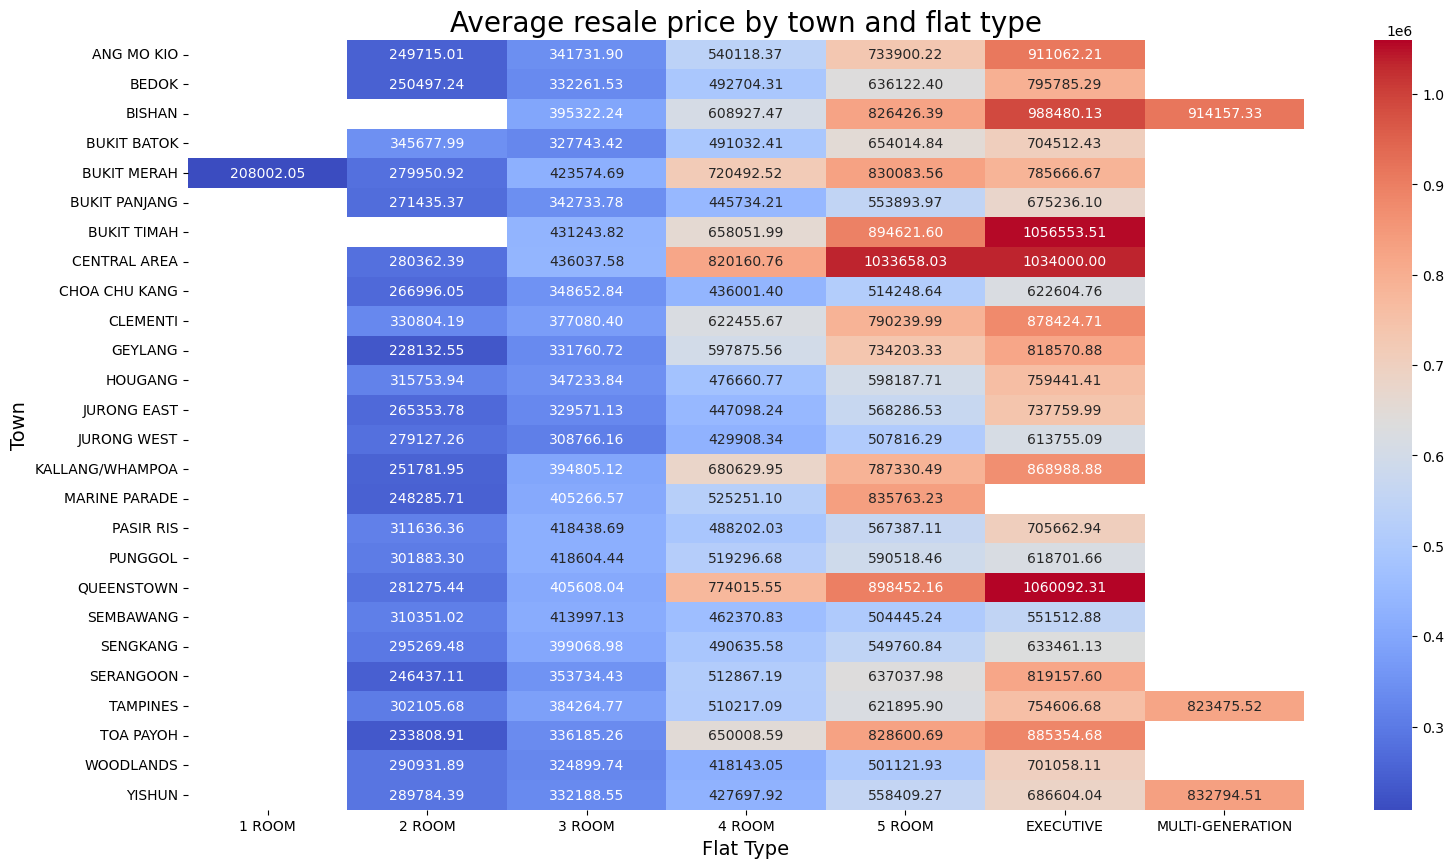

In [99]:
plt.figure(figsize=(18, 10))
sns.heatmap(group2, cmap="coolwarm", annot=True, fmt="0.2f", xticklabels=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])
plt.title('Average resale price by town and flat type', fontsize=20)
plt.xlabel('Flat Type', fontsize=14)
plt.ylabel('Town', fontsize=14)
plt.show()

# By Town

# Number of flats sold in each town

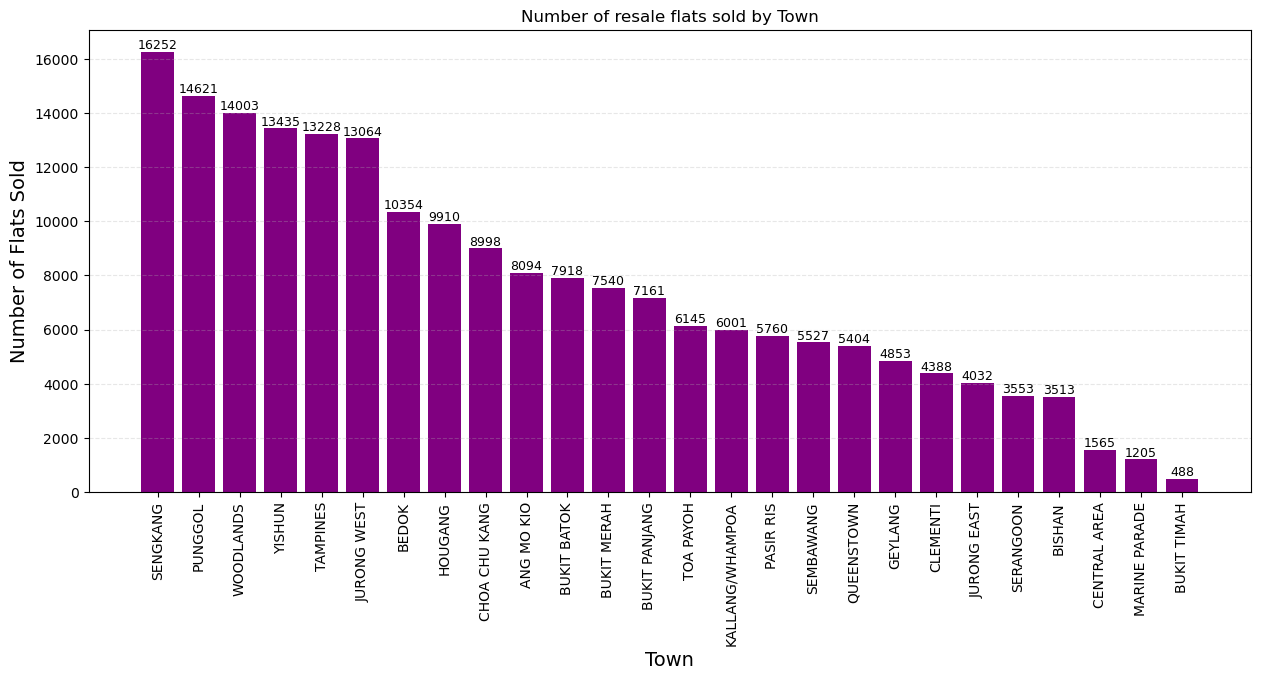

In [101]:
# Dictionary to store town counts
town_counts = {}

# Count the number of resale flats sold in each town
for town in hdb_data["town"]:
    if town not in town_counts:
        town_counts[town] = 1
    else:
        town_counts[town] += 1

# Sort the dictionary by values (number of flats sold) in descending order
sorted_dict1 = sorted(town_counts.items(), key=lambda item: item[1], reverse=True)
sorted_town = {k: v for k, v in sorted_dict1}

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.title('Number of resale flats sold by Town')

bars = plt.bar(x=list(sorted_town.keys()), height=list(sorted_town.values()), color="purple")

# Add labels on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar.get_height(),                  # Y-coordinate (top of the bar)
        f'{bar.get_height()}',             # Text to display (height of the bar)
        ha='center',                       # Horizontal alignment
        va='bottom',                       # Vertical alignment
        fontsize=9                        # Font size
    )

# Add labels and format the x-axis
plt.xlabel('Town', fontsize = 14)
plt.ylabel('Number of Flats Sold', fontsize = 14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.3)  # Add gridlines to the y-axis for readability

# Show the plot
plt.show()


From Number of Resale Flats Sold by Town bar chart,
* The town having the highest number of resale flats sold is Sengkang .
* The town having the lowest number of resale flats sold is Bukit Timah.

# Average and Median resale price By town

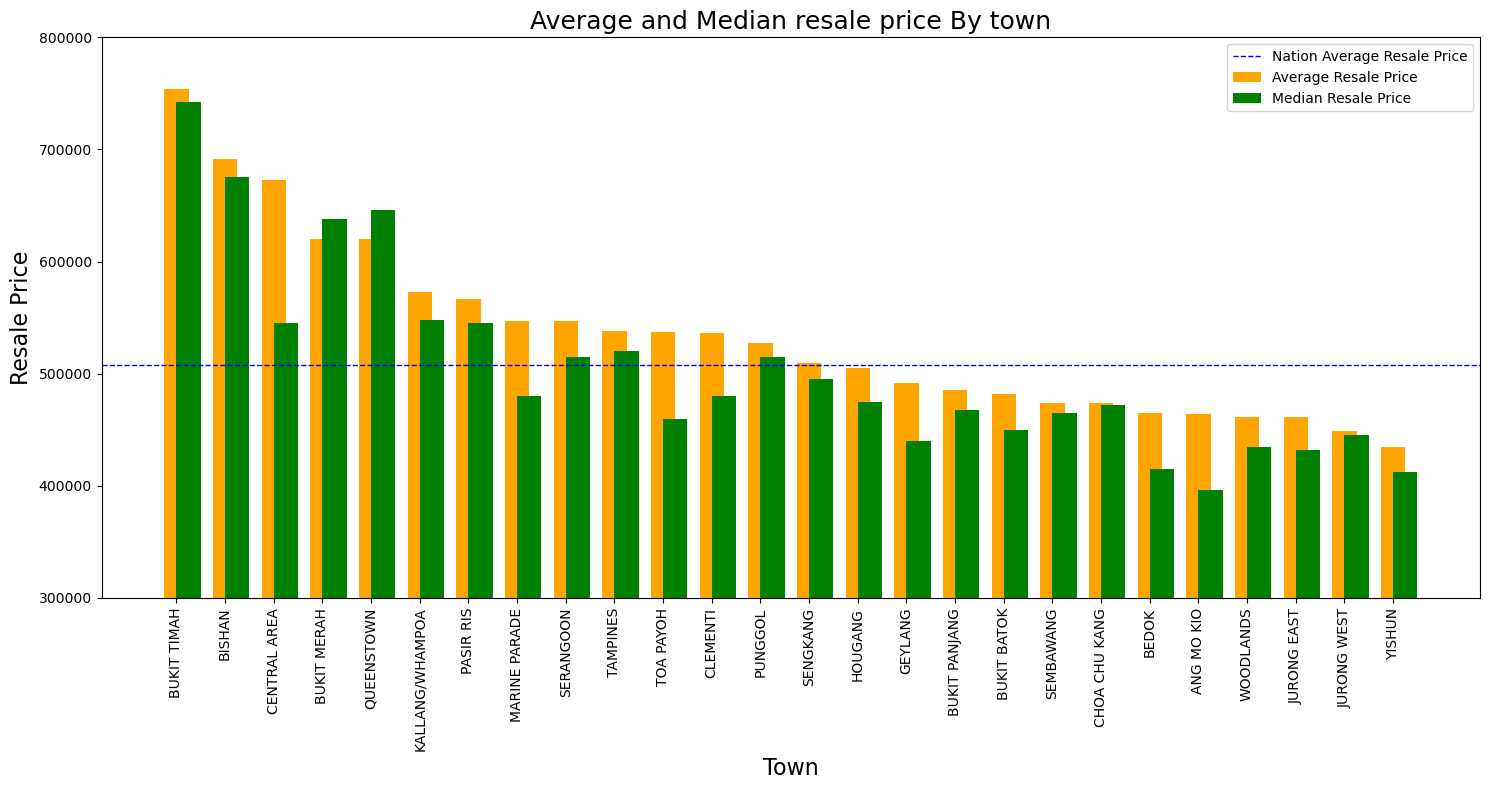

In [105]:
# Using BAR CHART to show the Mean and Median Resale Price By Town
group3 = df.groupby(['town'],as_index=False)['resale_price'].mean().sort_values(by='resale_price', ascending=False) # compute Mean Resale Price by Town
group4 = df.groupby(['town'],as_index=False)['resale_price'].median().sort_values(by='resale_price', ascending=False) # compute Median Resale Price by Town

overall_mean = float(df['resale_price'].mean())
overall_median = float(df['resale_price'].median())

# Create a bar plot
plt.figure(figsize=(15, 8))
plt.title('Average and Median resale price By town', fontsize=18)

# Plot bars for mean and median resale prices
plt.bar(x=group3['town'], height=group3['resale_price'], width=0.5, align='center', label='Average Resale Price', color='orange')
plt.bar(x=group4['town'], height=group4['resale_price'], width=0.5, align='edge', label='Median Resale Price', color='green')

# Plot the overall mean horizontal lines
plt.axhline(overall_mean, color='blue', linewidth=1, linestyle='--', label='Nation Average Resale Price')

# Labels and formatting
plt.xlabel('Town', fontsize=16)
plt.ylabel('Resale Price', fontsize=16)
plt.xticks(rotation=90)
plt.ylim(ymax=800000, ymin=300000)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

<u>From Bar chart of Mean Resale Price by Town,</u>
* Bukit Timah town has the highest average resale price while Yishun town has the lowest resale price.

* Central Region (Bukit Timah, Bishan, Bukit Merah, Central Area and Queenstown) generally have higher average resale price among other towns.

<u>From Bar chart of Median Resale Price by Town</u>
* Bukit Timah has the highest median resale price and Yishun has the lowest median resale price.

<u>Comparing the Mean & Median Resale Price:</u>
* Highest price difference of over $100K for Bukit Timah compared to other towns, likely due to the ‘million dollar’ resale flats.
* Smaller price differences for other towns.

**The Blue Dotted line represents the Nation-wide Average Resale Price.**
* Above the line means that the flats in that town is averaging more expensive than the Nation-wide average resale price.
* **This can help buyers to decide which town that match their budgets.**

# By Flat Type

# Number of flats sold by flat type

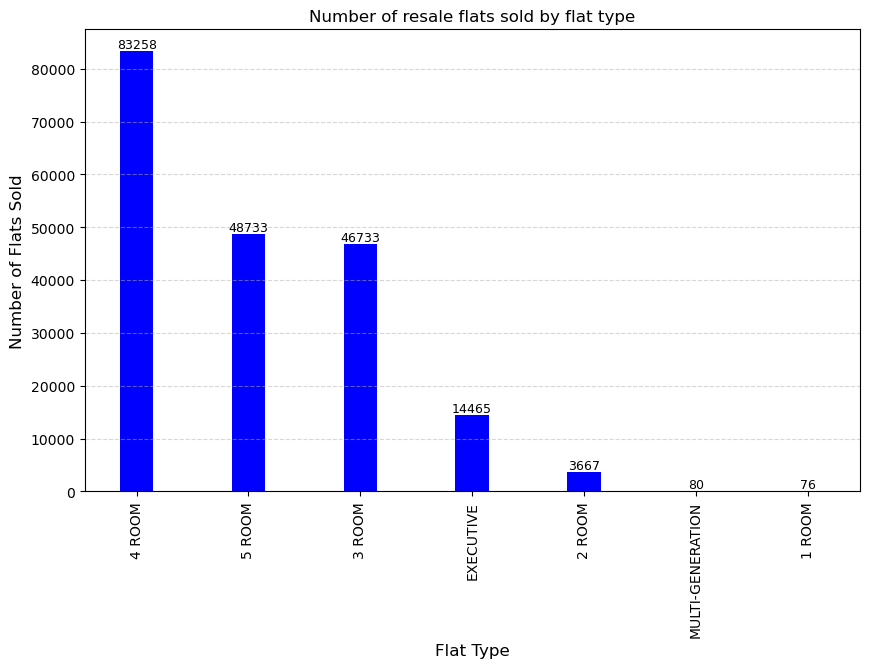

In [110]:
# Using BAR CHART to show the Number of Resale Flats Sold by Flat Type

counts = {}
for flat in hdb_data["flat_type"]:
    if flat not in counts:
        counts[flat] = 1
    else:
        counts[flat] += 1
        
plt.figure(figsize=(10, 6))
plt.title('Number of resale flats sold by flat type')

sorted_dict2 = sorted(counts.items(), key=lambda item: item[1], reverse=True)
sorted_counts = {k: v for k, v in sorted_dict2}

bars = plt.bar(x=list(sorted_counts.keys()), height=list(sorted_counts.values()), color="blue", width=0.3)

# Add labels on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar.get_height(),                  # Y-coordinate (top of the bar)
        f'{bar.get_height()}',             # Text to display (height of the bar)
        ha='center',                       # Horizontal alignment
        va='bottom',                       # Vertical alignment
        fontsize=9                        # Font size
    )

# Add labels and format the x-axis
plt.xlabel('Flat Type', fontsize = 12)
plt.ylabel('Number of Flats Sold', fontsize = 12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add gridlines to the y-axis for readability

# Show the plot

plt.show()

From the number of resale flats sold by flat type bar chart,

* The highest number of resale flats type sold is 4 Room Flat.
* The lowest number of resale flats sold is 1 Room Flat and Multi-Generation Flat. (1 Room Flat: 76 units, Multi-generation: 80 units)

# Average resale price by year and flat type

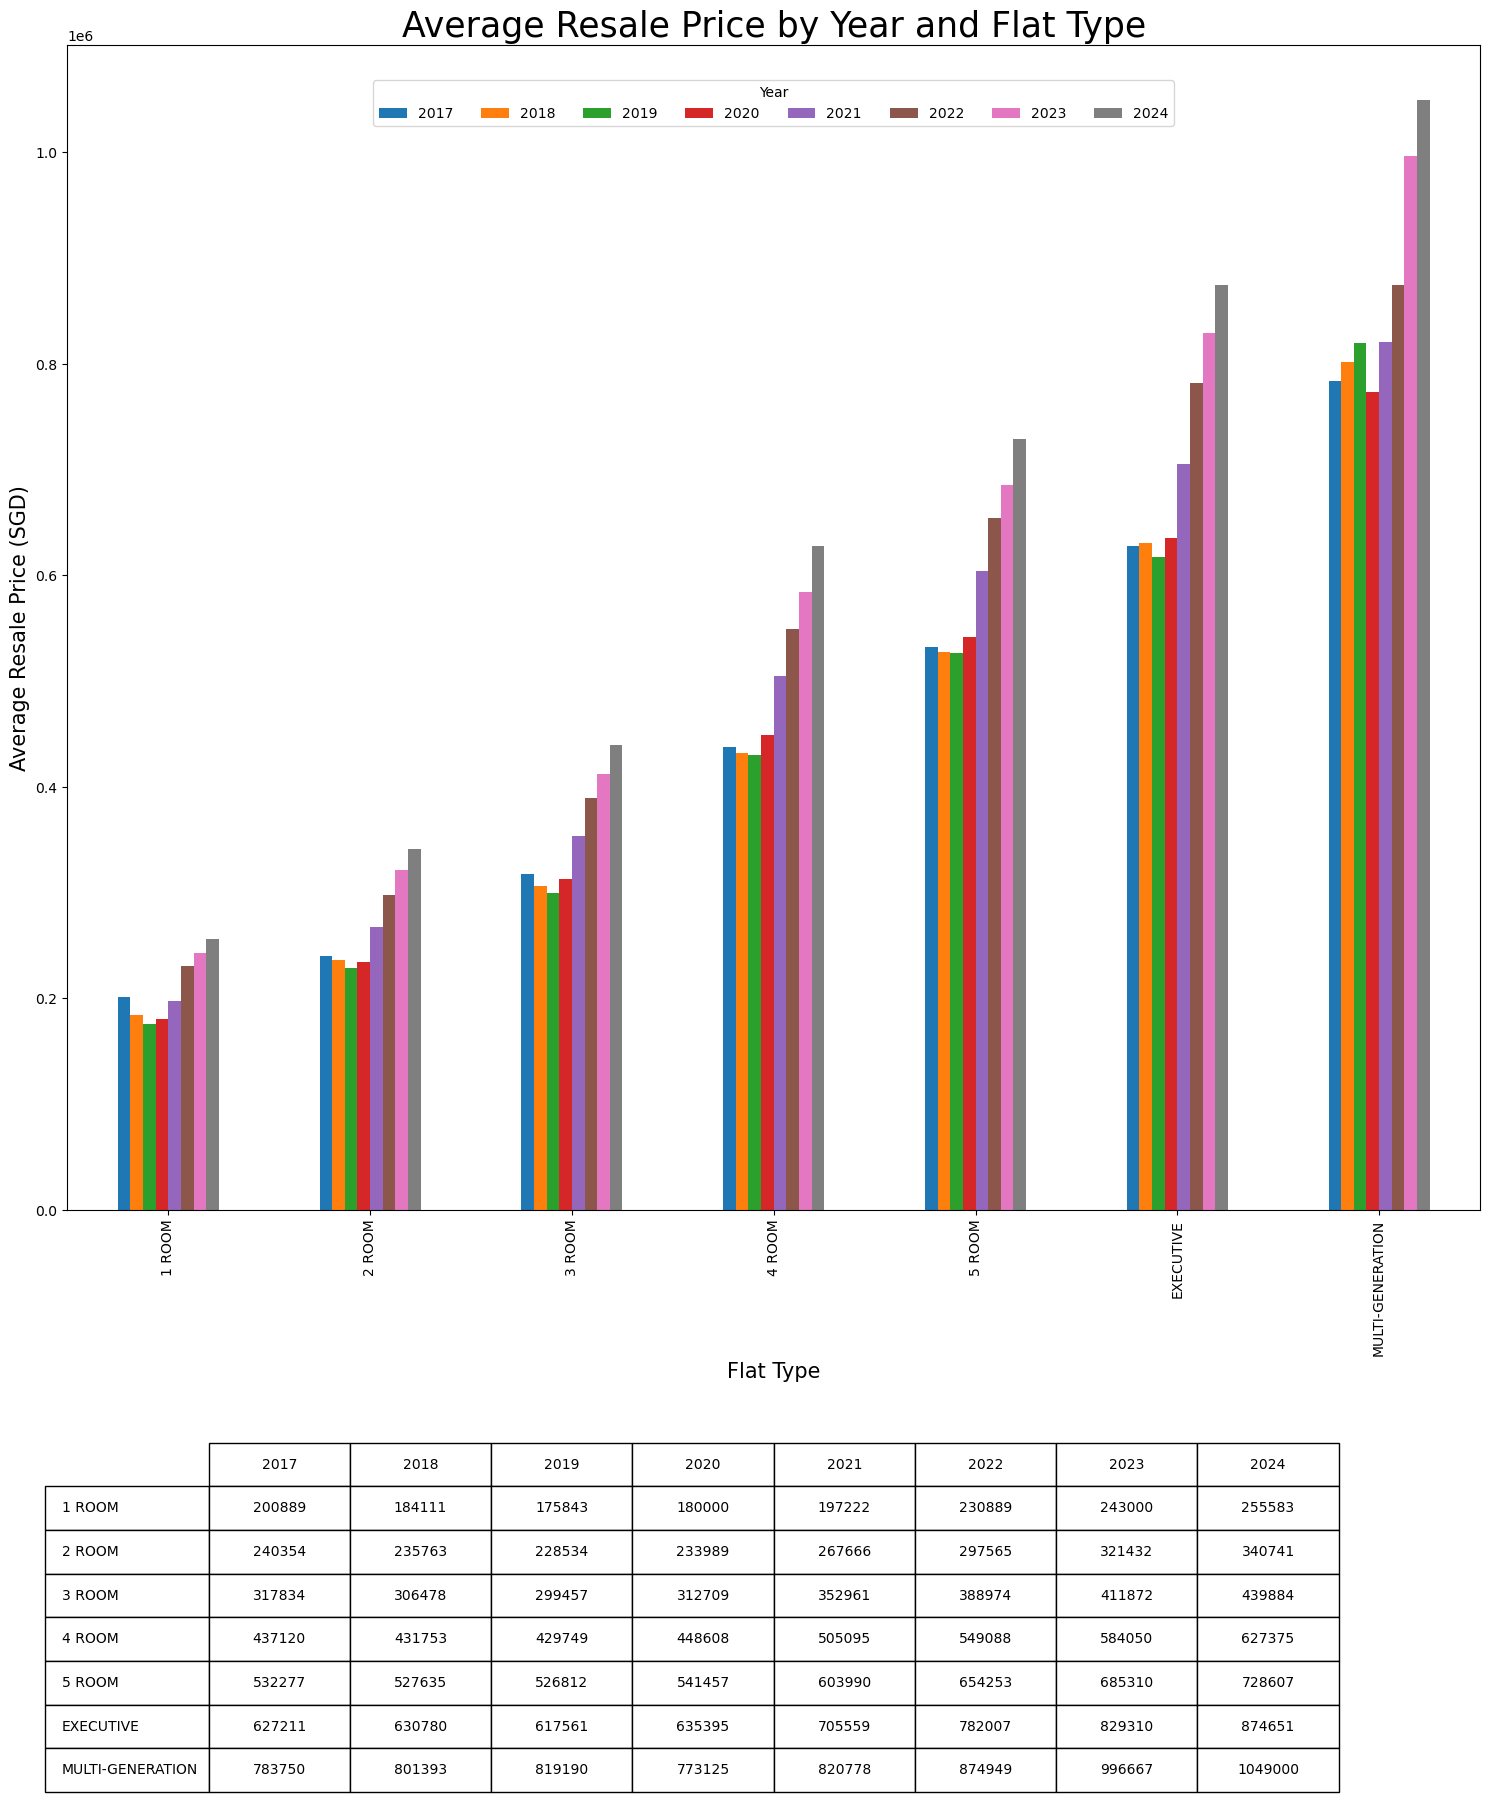

In [114]:
# Create a new DataFrame with a deep copy to avoid the warning
df1 = hdb_data[["month", "town", "flat_type", "resale_price"]].copy()

# Convert 'month' to datetime and extract the year
df1["month"] = pd.to_datetime(df1["month"], errors='coerce')
df1["year"] = df1["month"].dt.year

# Ensure 'resale_price' is numeric
df1['resale_price'] = pd.to_numeric(df1['resale_price'], errors='coerce')

# Group by year and flat_type, and calculate the mean resale price
group3 = df1.groupby(['year', 'flat_type'])['resale_price'].mean().reset_index()

# Pivot the table for plotting
group4 = group3.pivot(index="flat_type", columns="year", values="resale_price")

# Create the bar plot
fig, ax = plt.subplots(figsize=(15,20))

# Plot the bar chart
group4.plot(kind="bar", ax=ax)

# Add plot details
plt.title('Average Resale Price by Year and Flat Type', fontsize=25)
plt.xlabel('Flat Type', fontsize=15)
plt.ylabel('Average Resale Price (SGD)', fontsize=15)

# Set y-ticks
ticks = np.arange(0, 1200000, 200000)  # Tick values from 0 to 1.6m with a step of 200k
plt.yticks(ticks)

# Display the legend
plt.legend(title='Year', fontsize=10, loc='center', bbox_to_anchor=(0.5,0.95), ncol=8)

# Convert the pivoted data to a table format
table_data = group4.round(0).astype(int)  # Round to integer for cleaner display

# Plot the table below the chart
plt.table(cellText=table_data.values,
          colLabels=table_data.columns,
          rowLabels=table_data.index,
          loc='bottom',
          cellLoc='center',
          colLoc='center',
          bbox=[0.1, -0.5, 0.8, 0.3])  # Adjust position of the table

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


From the yearly resale price by Flat type Bar chart,

**<u>For 1 Room Flat to 3 Room Flat</u>**
* Resale price from 2018 to 2019 generally decreases, and in 2020, the resale price rises again.

**<u>For 4 Room Flat to 5 Room Flat</u>**
* Resale price in 2018 and 2019 decreases when compared to year 2017. In 2020, the resale price overtakes that of year 2017.

**<u>For Executive Flat</u>**
* Resale price fluctuates from 2017 to 2020. In year 2018, the resale price went up. It went down in 2019 and up again in 2020.

**<u>For Multi-Generation Flat</u>**
* Resale price initially increases from 2017 to 2019, but in 2020, the resale price goes below that of 2017.

**<u>Conclusion:</u>**
* There are similarities increasing trend of resale prices from year 2020 across all flat types. 
* The reason for the decline in the resales prices from 1 room to Executive flats in 2019 could be due to lesser demand during the COVID19 pandemic.

# Average resale price By flat type

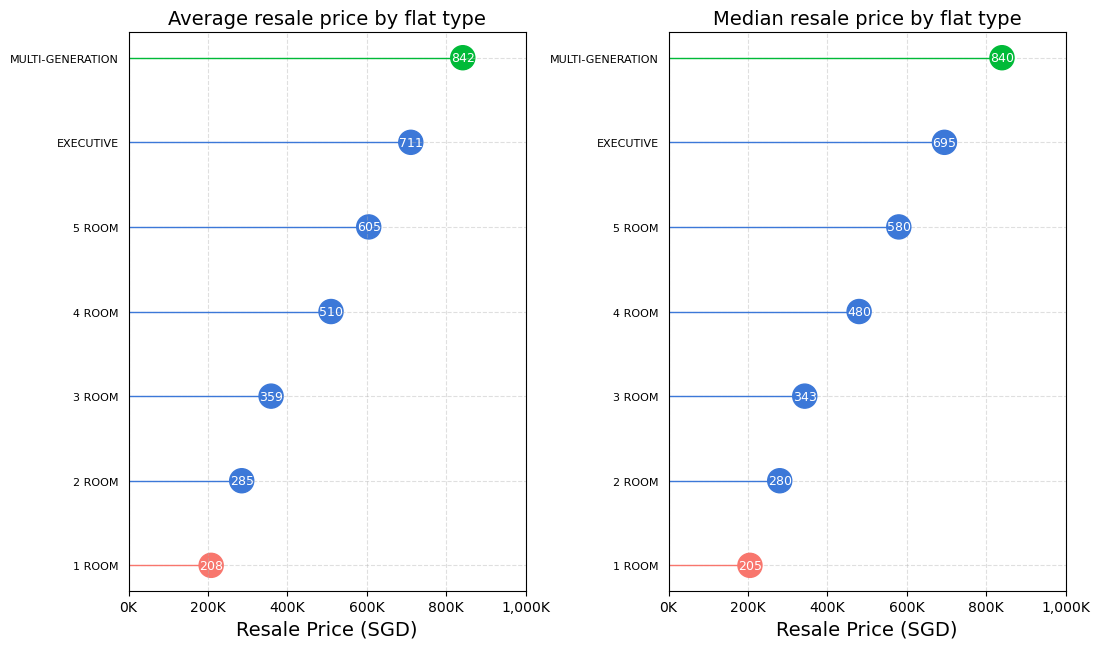

In [118]:
## Extract out year
hdb_data['year'] = pd.DatetimeIndex(hdb_data['month']).year 

## mean sales price by town
hdb_price = hdb_data[hdb_data['year'].isin([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])].groupby(['flat_type'], as_index=False).agg({'resale_price': 'mean'}).sort_values('resale_price', ascending=True).reset_index(drop=True)
hdb_price['resale_price'] = round(hdb_price['resale_price']/1000)
hdb_price['color'] = ['#f8766d'] + ['#3c78d8']*(len(hdb_price)-2) + ['#00ba38']
## median sales price by flat type
hdb_price1 = hdb_data[hdb_data['year'].isin([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])].groupby(['flat_type'], as_index=False).agg({'resale_price': 'median'}).sort_values('resale_price', ascending=True).reset_index(drop=True)
hdb_price1['resale_price'] = round(hdb_price1['resale_price']/1000)
hdb_price1['color'] = ['#f8766d'] + ['#3c78d8']*(len(hdb_price1)-2) + ['#00ba38']


def loll_plot(df, x, y, subtitle, xlabel, xlim):
    plt.rc('axes', axisbelow=True)
    plt.grid(linestyle='--', alpha=0.4)
    plt.hlines(y=df.index, xmin=0, xmax=df[x], color=df.color, linewidth=1)
    plt.scatter(df[x], df.index, color=df.color, s=300)
    for i, txt in enumerate(df[x]):
        plt.annotate(str(round(txt)), (txt, i), color='white', fontsize=9, ha='center', va='center')
    plt.annotate(subtitle, xy=(1, 0), xycoords='axes fraction', fontsize=20,
                    xytext=(-5, 5), textcoords='offset points', ha='right', va='bottom')
    plt.yticks(df.index, df[y], fontsize=8); plt.xticks(fontsize=10); plt.xlim(xlim)
    plt.xlabel(xlabel, fontsize=14)

fig = plt.figure(figsize=(12, 7))

ax1 = plt.subplot(121)
loll_plot(hdb_price, 'resale_price', 'flat_type','', 'Resale Price (SGD)', [50, 1000])
xticks1 = ax1.get_xticks()  # Retrieve the current x-tick positions
ax1.set_title('Average resale price by flat type', fontsize=14)
ax1.set_xticks(xticks1)  # Explicitly set the ticks
ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in xticks1])  # Format the tick labels
ax1.yaxis.set_ticks_position('none')

ax2 = plt.subplot(122)
loll_plot(hdb_price1, 'resale_price', 'flat_type','', 'Resale Price (SGD)', [50, 1000])
ax2.set_title('Median resale price by flat type', fontsize=14)
xticks2 = ax2.get_xticks()
ax2.set_xticks(xticks2)
ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in xticks2])
ax2.yaxis.set_ticks_position('none')

fig.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

<u>From Lollipop chart of Average Resale Price by Flat Type,</u>
* Multi-Generation Flat type has the highest average resale price while 1 Room flat type has the lowest average resale price.

<u>Comparing the Average & Median Resale Price:</u>
* There is no significant difference in the distributions for all flat types.

# By Storey

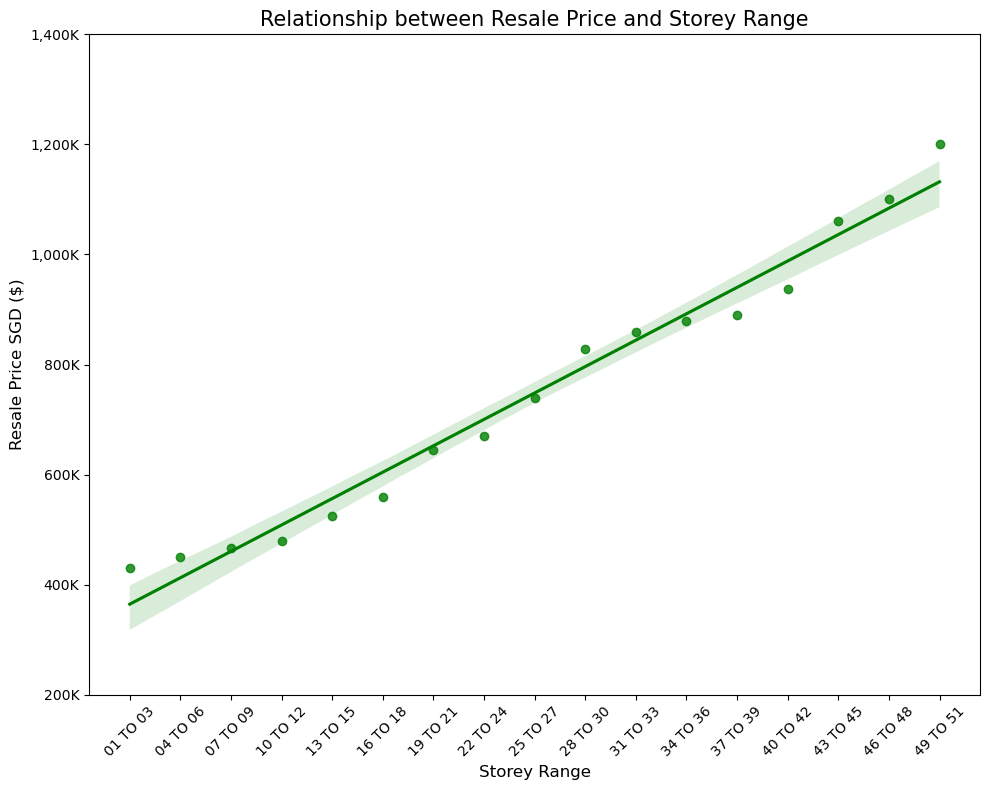

Pearson Coefficient = 0.9882
P-value = 0.0000


In [122]:
# Group and process data
storey = hdb_data.groupby('storey_range')['resale_price'].median().reset_index().sort_values(by='storey_range')
storey['storey_rank'] = storey['storey_range'].astype('category').cat.codes  # Label encode

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x='storey_rank', y='resale_price', data=storey, color='green', ax=ax)

# Set x-axis tick labels
ax.set_xticks(storey['storey_rank'])
ax.set_xticklabels(storey['storey_range'], rotation=45)

# Set y-axis tick labels with formatted values
y_ticks = ax.get_yticks()
ylabels = ['{:,.0f}'.format(y / 1000) + 'K' for y in y_ticks]
ax.set_yticks(y_ticks)
ax.set_yticklabels(ylabels)

# Customize axis limits and labels
ax.set_ylim([200000, 1400000])
ax.set_ylabel('Resale Price SGD ($)', size=12)
ax.set_xlabel('Storey Range', size=12)
ax.set_title('Relationship between Resale Price and Storey Range', size=15)

plt.tight_layout()
plt.show()

# Computing Pearson Correlation Coefficient and p-value
pearson_coef, p_value = stats.pearsonr(storey['storey_rank'], storey['resale_price'])

# Format and print the results
formatted_p_value = format(p_value, '.4f')
formatted_pearson_coef = format(pearson_coef, '.4f')
print(f"Pearson Coefficient = {formatted_pearson_coef}")
print(f"P-value = {formatted_p_value}")


Pearson coefficient is to measure how strength of the relationship(value can fall between -1 & 1; 1 being strongest positive correlation, -1 being strongest negative correlation).

![An image](image.png)


Pearson coefficient (r) of 0.9882 indicates that there is a positive strong linear relationship between Resale Price and Storey Range.

The P value is 0.0 which means that there is statisitcally significance correlation between the resale price and storey range.

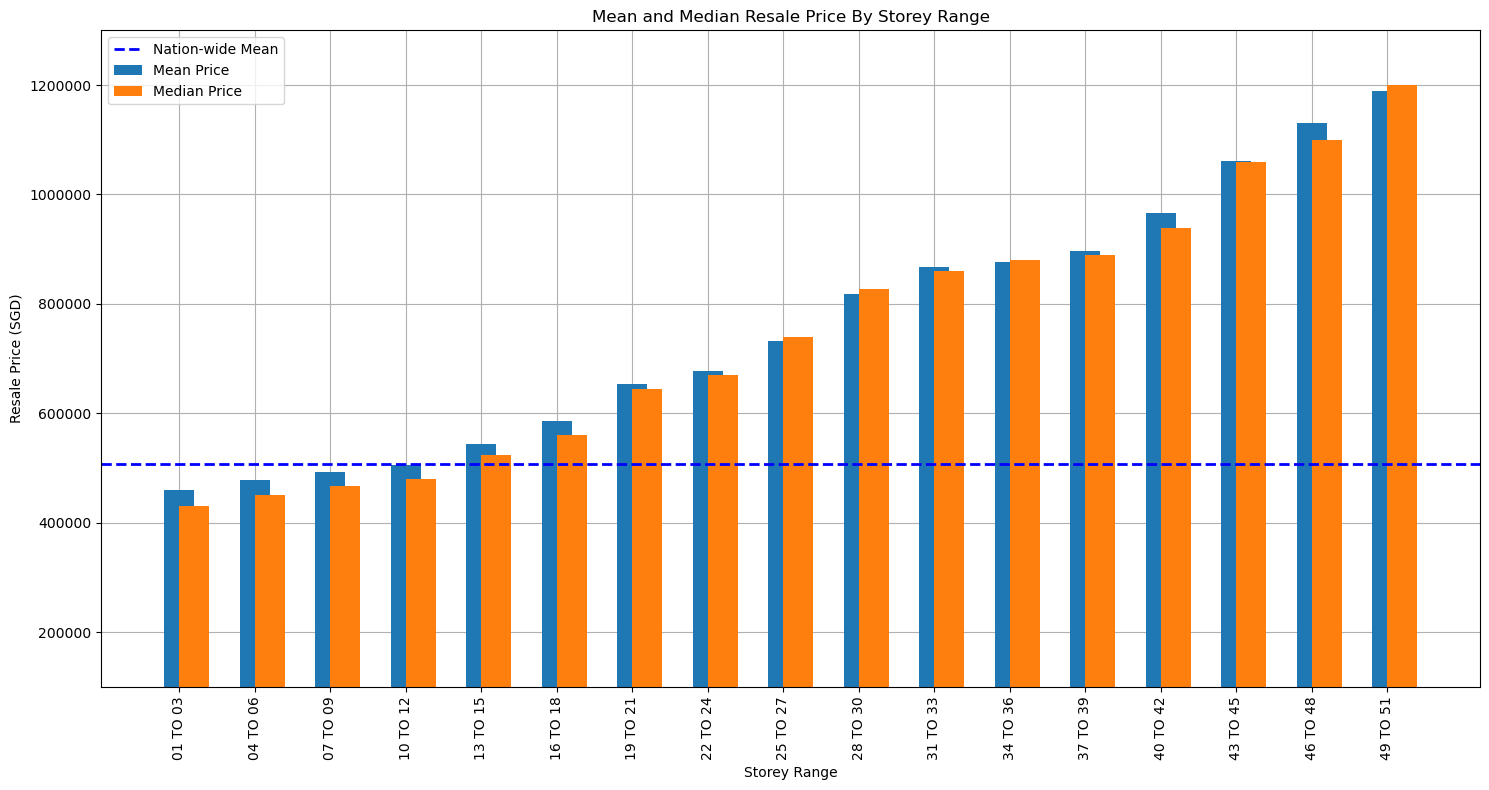

In [125]:
# Create a new DataFrame with the relevant columns
df2 = hdb_data[["storey_range", "resale_price"]]

# Compute Mean and Median Resale Price by storey range
group5 = df2.groupby(["storey_range"], as_index=False).mean()
group6 = df2.groupby(["storey_range"], as_index=False).median()

# Compute overall mean and median resale price
overall_mean1 = df2["resale_price"].mean()
overall_median2 = df2["resale_price"].median()

# Plot Mean and Median Resale Price by storey range
plt.figure(figsize=(15, 8))
plt.title("Mean and Median Resale Price By Storey Range")

# Plot bars for mean and median resale price
plt.bar(x=group5["storey_range"], height=group5["resale_price"], width=0.4, align="center", label='Mean Price')
plt.bar(x=group6["storey_range"], height=group6["resale_price"], width=0.4, align="edge", label='Median Price')
plt.axhline(overall_mean1, color='blue', linewidth=2, linestyle="--", label='Nation-wide Mean') # show nation-wide mean resale price

# Add labels and format the x-axis
plt.xlabel("Storey Range")
plt.ylabel("Resale Price (SGD)")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.ylim(ymax=1300000, ymin=100000)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Conclusion for higher storey flats:
* Based on the scatter plot and bar charts, we can conclude that the higher storeys flats sold at a higher resale price.

# By Floor Area SQM

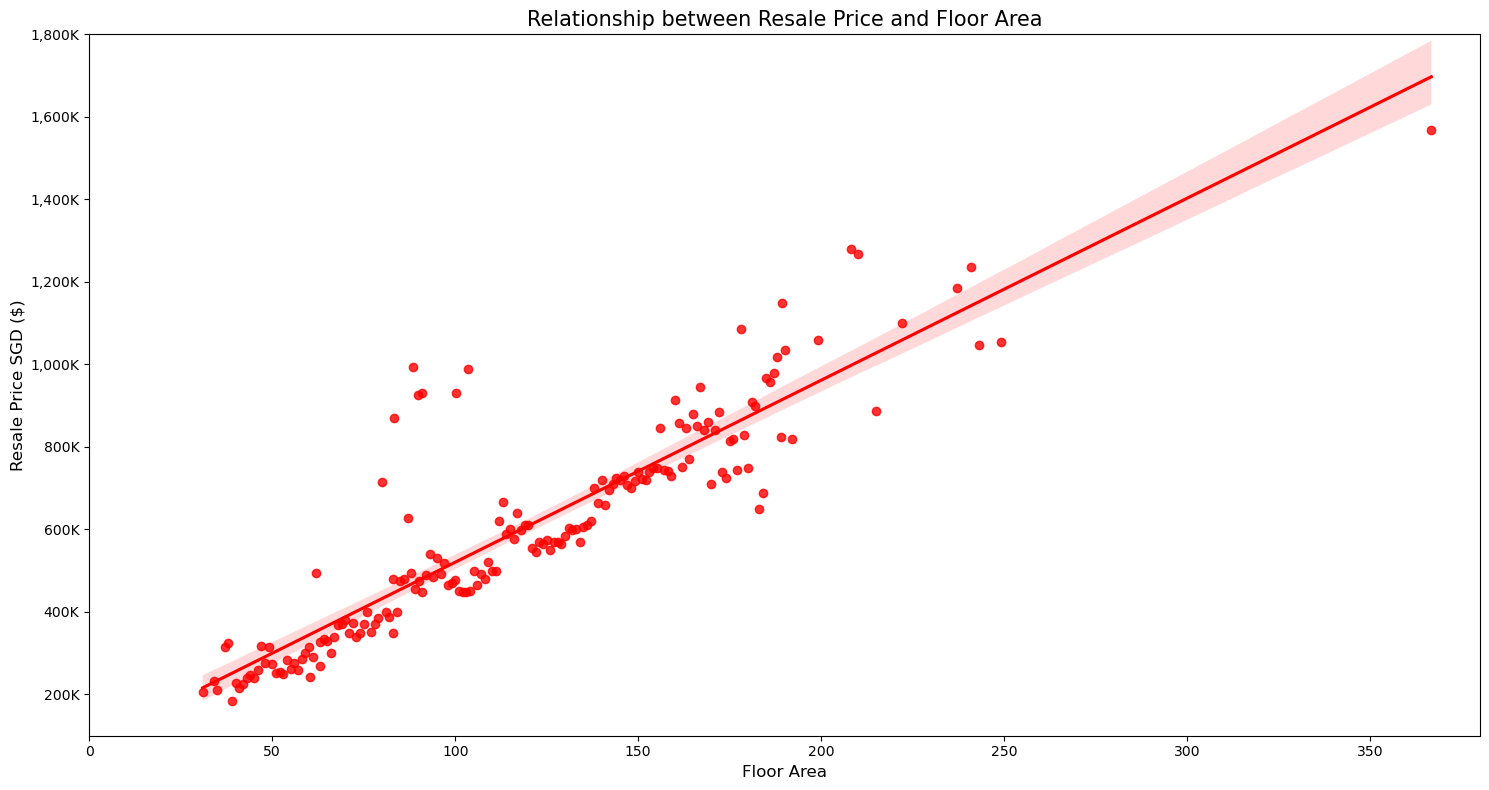

Pearson Coefficient = 0.9029
P-value = 0.0000


In [129]:
# Scatter Plot
fig = plt.figure(figsize=(15, 8))
floor = hdb_data.groupby('floor_area_sqm')['resale_price'].median().reset_index().sort_values(by='floor_area_sqm')
plot_area = sns.regplot(x=floor['floor_area_sqm'], y=floor['resale_price'], data=floor['resale_price'], color='red')

# Set y-axis tick labels using FixedLocator
y_ticks = plot_area.get_yticks()
plot_area.yaxis.set_major_locator(FixedLocator(y_ticks))
ylabels = ['{:,.0f}'.format(x) + 'K' for x in y_ticks/1000]
plot_area.set_yticklabels(ylabels)

# Set axis limits and labels
plot_area.set_ylim([100000, 1800000])
plot_area.set_ylabel('Resale Price SGD ($)', size=12)
plot_area.set_xlim([0, 380])
plot_area.set_xlabel('Floor Area', size=12)
plot_area.set_title('Relationship between Resale Price and Floor Area', size=15)

plt.tight_layout()
plt.show()


pearson_coef, p_value = stats.pearsonr(floor['floor_area_sqm'], floor['resale_price'])
formatted_p_value = format(p_value, '.4f')
formatted_pearson_coef = format(pearson_coef, '.4f')
print(f"Pearson Coefficient = {formatted_pearson_coef}")
print(f"P-value = {formatted_p_value}")

plt.show()

Pearson coefficient (r) of 0.9029 indicates that there is indicates a very strong positive linear relationship between resale price and floor area.
The P value is 0.0 which means that there is statisitcally significance correlation between the resale price and floor area.
# Conclusion for larger area flats:
* Based on the scatter plot, we can conclude that larger area flats are sold at a higher resale price.

# By lease commence year

# Number of flats sold based on lease commence year

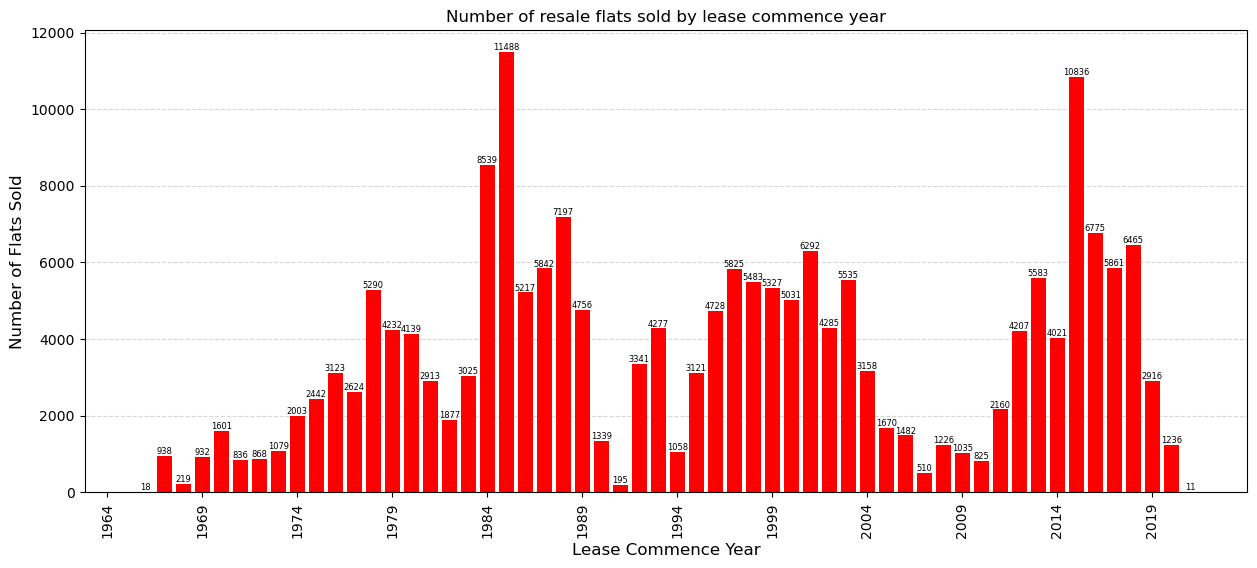

In [134]:
# Using BAR CHART to show the Number of Resale Flats Sold based on lease commence year
lease_counts = {}

for lease_commence_year in hdb_data["lease_commence_year"]:
    if lease_commence_year not in lease_counts:
        lease_counts[lease_commence_year] = 1
    else:
        lease_counts[lease_commence_year] += 1

plt.figure(figsize=(15, 6))
plt.title('Number of resale flats sold by lease commence year')

sorted_dict3 = sorted(lease_counts.items(), key=lambda item: item[1], reverse=True)
sorted_lease = {k: v for k, v in sorted_dict3}

bars = plt.bar(x=sorted_lease.keys(), height=sorted_lease.values(), color="red")

# Add labels on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar.get_height(),                  # Y-coordinate (top of the bar)
        f'{bar.get_height()}',             # Text to display (height of the bar)
        ha='center',                       # Horizontal alignment
        va='bottom',                       # Vertical alignment
        fontsize=6                        # Font size
    )
x = np.arange(1964, 2024, 1)
# Add labels and format the x-axis
plt.xlabel('Lease Commence Year', fontsize = 12)
plt.xlim(left=None, right=2024)
plt.ylabel('Number of Flats Sold', fontsize = 12)
plt.xticks(np.arange(min(x), 2021, 5), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add gridlines to the y-axis for readability

# Show the plot
plt.show()

From Bar chart of Number of Resale Flats Sold per Lease Commence Date **(data is from Past HDB Resales Transaction from Jan 2017 to Nov 2020)**,
* Resale Flats sold per lease commence date varies.
* Top 2 highest number of resale flats sold have their lease commence dates in years 1985 and 2015. The latter could possibly because a lot of flats reached their Minimum Occupation Period

# By Distance to Nearest Amenities

In [138]:
# load the flat_amenities dataset
flat_amenities = pd.read_csv('flat_amenities.csv')

In [140]:
# merge amenities data to flat data
pricesdf = hdb_data[hdb_data['year'].isin([2017,2018,2019,2020,2021,2022,2023,2024])]
pricesdf['flat'] = hdb_data['block'] + ' ' + hdb_data['street_name']
pricesdf = pricesdf.merge(flat_amenities, on='flat', how='left')

# reduce number of class of town to regions
d_region = {'ANG MO KIO':'North East', 'BEDOK':'East', 'BISHAN':'Central', 'BUKIT BATOK':'West', 'BUKIT MERAH':'Central',
       'BUKIT PANJANG':'West', 'BUKIT TIMAH':'Central', 'CENTRAL AREA':'Central', 'CHOA CHU KANG':'West',
       'CLEMENTI':'West', 'GEYLANG':'Central', 'HOUGANG':'North East', 'JURONG EAST':'West', 'JURONG WEST':'West',
       'KALLANG/WHAMPOA':'Central', 'MARINE PARADE':'Central', 'PASIR RIS':'East', 'PUNGGOL':'North East',
       'QUEENSTOWN':'Central', 'SEMBAWANG':'North', 'SENGKANG':'North East', 'SERANGOON':'North East', 'TAMPINES':'East',
       'TOA PAYOH':'Central', 'WOODLANDS':'North', 'YISHUN':'North'}
pricesdf['region'] = pricesdf['town'].map(d_region)
colors = {'North East':'Purple', 'East':'Green', 'Central':'Brown', 'West':'Red', 'North':'Orange'}

In [142]:
# get median info of each town by the amenities
tmp = pricesdf.groupby('town')[['dist_dhoby','school_dist','num_school_2km','hawker_dist','num_hawker_2km','park_dist','num_park_2km','mall_dist','num_mall_2km','mrt_dist','num_mrt_2km','supermarket_dist','num_supermarket_2km','resale_price']].median().reset_index()
tmp['region'] = tmp['town'].map(d_region)

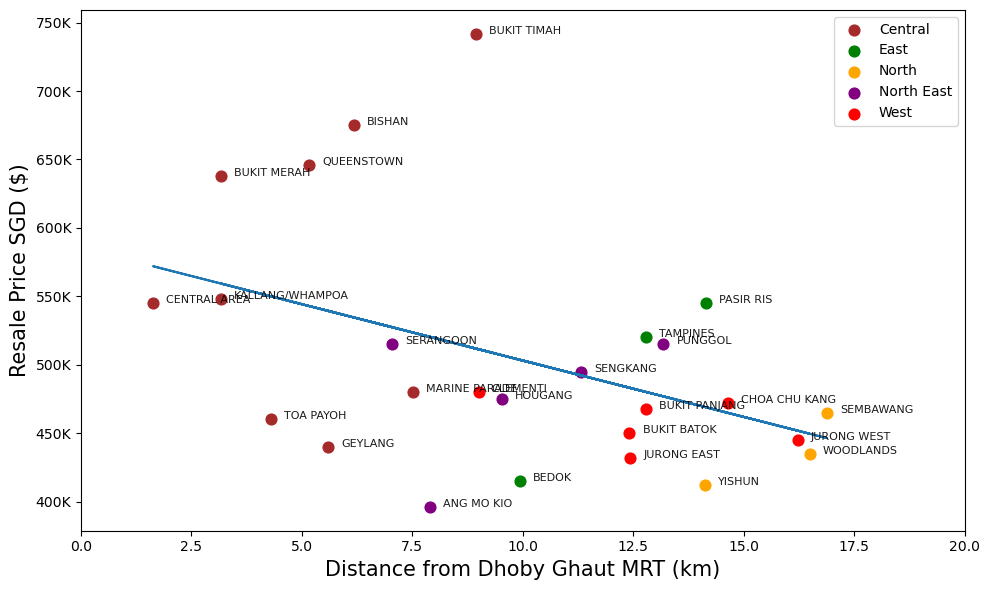

In [144]:
# Scatterplot with names of towns
fig, ax = plt.subplots(figsize=(10,6))
grouped = tmp.groupby('region')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='dist_dhoby', y='resale_price', label=key, color=colors[key], s=60)

# Fit and plot the regression line
b, a = np.polyfit(tmp['dist_dhoby'], tmp['resale_price'], 1)
ax.plot(tmp['dist_dhoby'], a + b * tmp['dist_dhoby'], '-')  

# Set x-axis limits and label
ax.set_xlim([0, 20])
ax.set_xlabel('Distance from Dhoby Ghaut MRT (km)', size=15)

# Set y-axis tick labels using FixedLocator
y_ticks = ax.get_yticks()
ax.yaxis.set_major_locator(FixedLocator(y_ticks))
ylabels = ['{:,.0f}'.format(x) + 'K' for x in y_ticks / 1000]
ax.set_yticklabels(ylabels)
ax.set_ylabel('Resale Price SGD ($)', size=15)

# Annotate points with town names
for i, txt in enumerate(tmp['town']):
    ax.annotate(txt, (tmp['dist_dhoby'][i] + 0.3, tmp['resale_price'][i]), size=8, alpha=0.9)

plt.tight_layout()
plt.show()

In [146]:
sorted_median_prices = pricesdf.groupby('region')['resale_price'].median().sort_values(ascending=False)
print('Resale Prices by Region')
print(sorted_median_prices)

Resale Prices by Region
region
Central       570000.0
East          500000.0
North East    488000.0
West          455000.0
North         430000.0
Name: resale_price, dtype: float64


#### Relationship of flats further from town and the resale price
Therefore from this chart, we can see that the relationship is negative. Those flats that are further away from Dhoby Ghaut MRT (Central) are having lower resale prices.

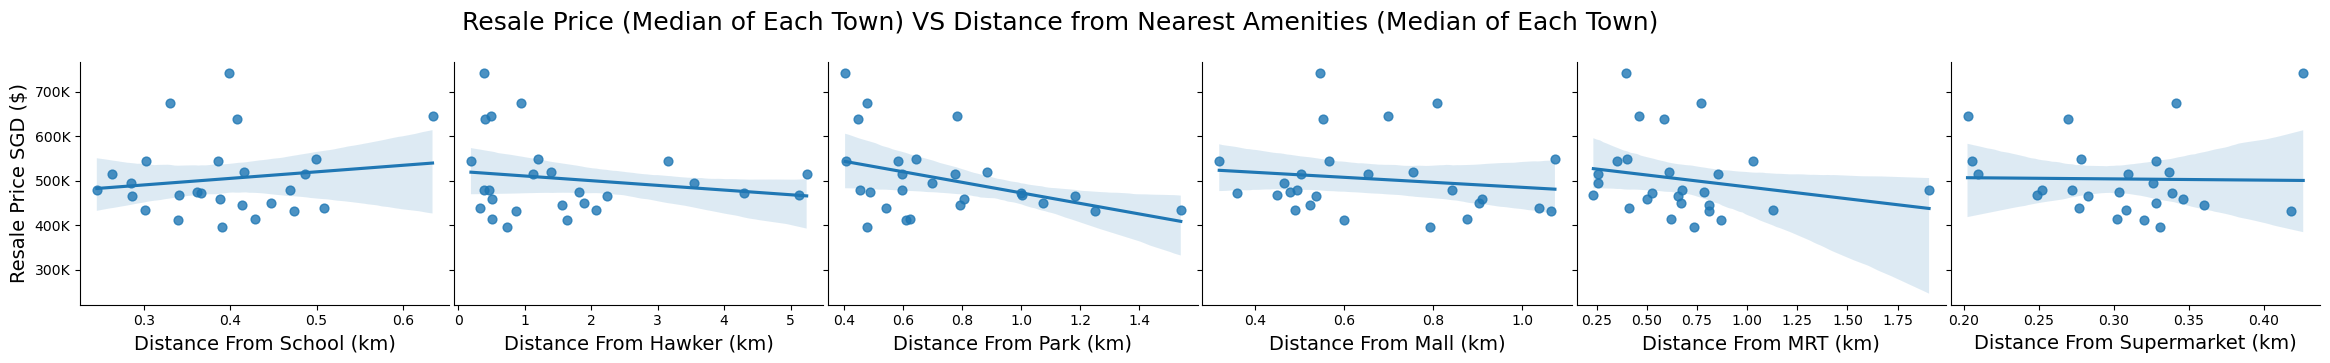

In [149]:
# Plot pairplot
p = sns.pairplot(tmp, x_vars=["school_dist", "hawker_dist", "park_dist", "mall_dist", "mrt_dist", "supermarket_dist"], 
                 y_vars=["resale_price"], height=3.5, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=40)))

axes = p.axes

# Set y-axis tick labels using FixedLocator for the first plot
y_ticks = axes[0,0].get_yticks()
axes[0,0].yaxis.set_major_locator(FixedLocator(y_ticks))
ylabels = ['{:,.0f}'.format(x) + 'K' for x in y_ticks / 1000]
axes[0,0].set_yticklabels(ylabels)
axes[0,0].set_ylabel('Resale Price SGD ($)', size=14)

# Set x-axis labels for each plot
axes[0,0].set_xlabel('Distance From School (km)', size=14)
axes[0,1].set_xlabel('Distance From Hawker (km)', size=14)
axes[0,2].set_xlabel('Distance From Park (km)', size=14)
axes[0,3].set_xlabel('Distance From Mall (km)', size=14)
axes[0,4].set_xlabel('Distance From MRT (km)', size=14)
axes[0,5].set_xlabel('Distance From Supermarket (km)', size=14)

# Set the main title
plt.suptitle('Resale Price (Median of Each Town) VS Distance from Nearest Amenities (Median of Each Town)', fontsize=18)

# Adjust layout
plt.tight_layout(pad=0, rect=[0, 0, 1.1, 0.9])
plt.show()

* Proximity to parks, malls, and MRT stations appears to positively influence property prices, with prices generally declining as distance from these amenities increases.
* Proximity to schools and supermarkets seems to have little to no impact on resale prices.
* Proximity to hawker centers might also play a small but notable role in enhancing resale prices.

Overall, the analysis suggests that buyers may value certain amenities such as parks, MRT stations and malls, more than others which influencing their willingness to pay higher resale prices for closer proximity.

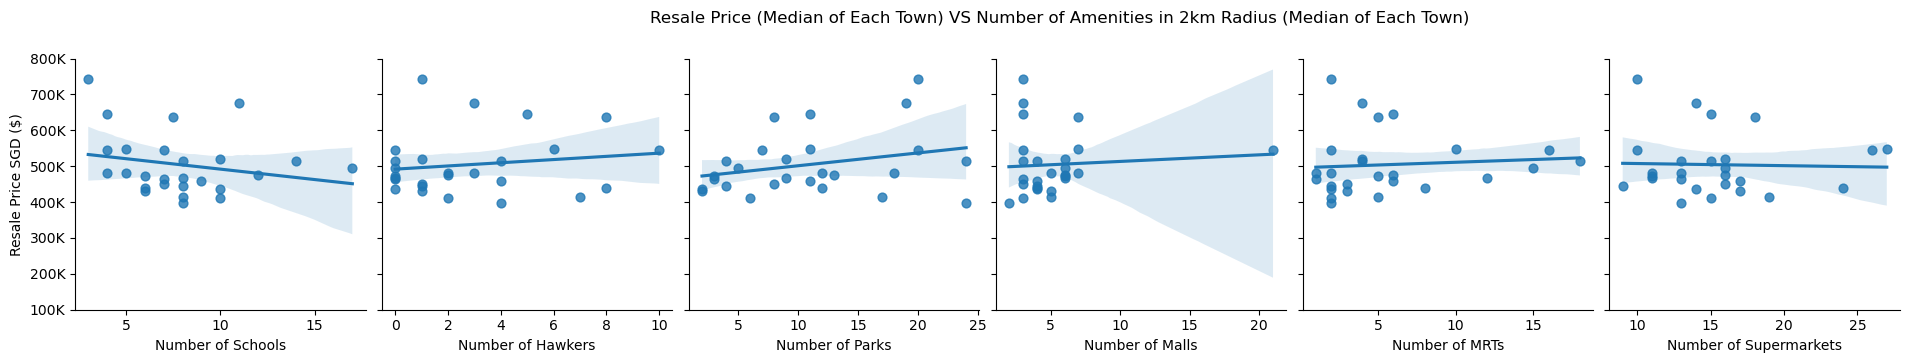

In [151]:

# Create the pairplot
p = sns.pairplot(tmp, x_vars=["num_school_2km", "num_hawker_2km", "num_park_2km", "num_mall_2km", "num_mrt_2km", "num_supermarket_2km"], 
                 y_vars=["resale_price"], height=3.5, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=40)))

# Get the axes
axes = p.axes

# Format the y-axis labels
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]

# Set the y-axis ticks and labels
axes[0,0].set_yticks(axes[0,0].get_yticks())  # Set the tick positions
axes[0,0].set_yticklabels(ylabels)  # Apply custom labels
axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)

# Set x-axis labels
axes[0,0].set_xlabel('Number of Schools', size=10)
axes[0,1].set_xlabel('Number of Hawkers', size=10)
axes[0,2].set_xlabel('Number of Parks', size=10)
axes[0,3].set_xlabel('Number of Malls', size=10)
axes[0,4].set_xlabel('Number of MRTs', size=10)
axes[0,5].set_xlabel('Number of Supermarkets', size=10)

# Set the title
plt.suptitle('Resale Price (Median of Each Town) VS Number of Amenities in 2km Radius (Median of Each Town)')

# Adjust layout
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])

# Show the plot
plt.show()

* Most amenities show weak relationships with resale prices.
Proximity to hawkers, parks, MRT stations, and malls appears to have a slightly positive effect on property prices, whereas the presence of schools and supermarkets may have a negligible or slightly negative impact.
These results suggest that amenities play a role in property resale prices, but the influence is not very significant.

In [153]:
df3 = pricesdf[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_year', 'year', 'school_dist', 'num_school_2km', 'hawker_dist', 'num_hawker_2km', 'park_dist', 'num_park_2km', 'mall_dist', 'num_mall_2km', 'mrt_dist', 'num_mrt_2km', 'supermarket_dist', 'num_supermarket_2km', 'dist_dhoby', 'region', 'resale_price']]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197012 entries, 0 to 197011
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 197012 non-null  object 
 1   flat_type            197012 non-null  object 
 2   storey_range         197012 non-null  object 
 3   floor_area_sqm       197012 non-null  float64
 4   flat_model           197012 non-null  object 
 5   lease_commence_year  197012 non-null  int64  
 6   year                 197012 non-null  int32  
 7   school_dist          197012 non-null  float64
 8   num_school_2km       197012 non-null  int64  
 9   hawker_dist          197012 non-null  float64
 10  num_hawker_2km       197012 non-null  int64  
 11  park_dist            197012 non-null  float64
 12  num_park_2km         197012 non-null  int64  
 13  mall_dist            197012 non-null  float64
 14  num_mall_2km         197012 non-null  int64  
 15  mrt_dist         

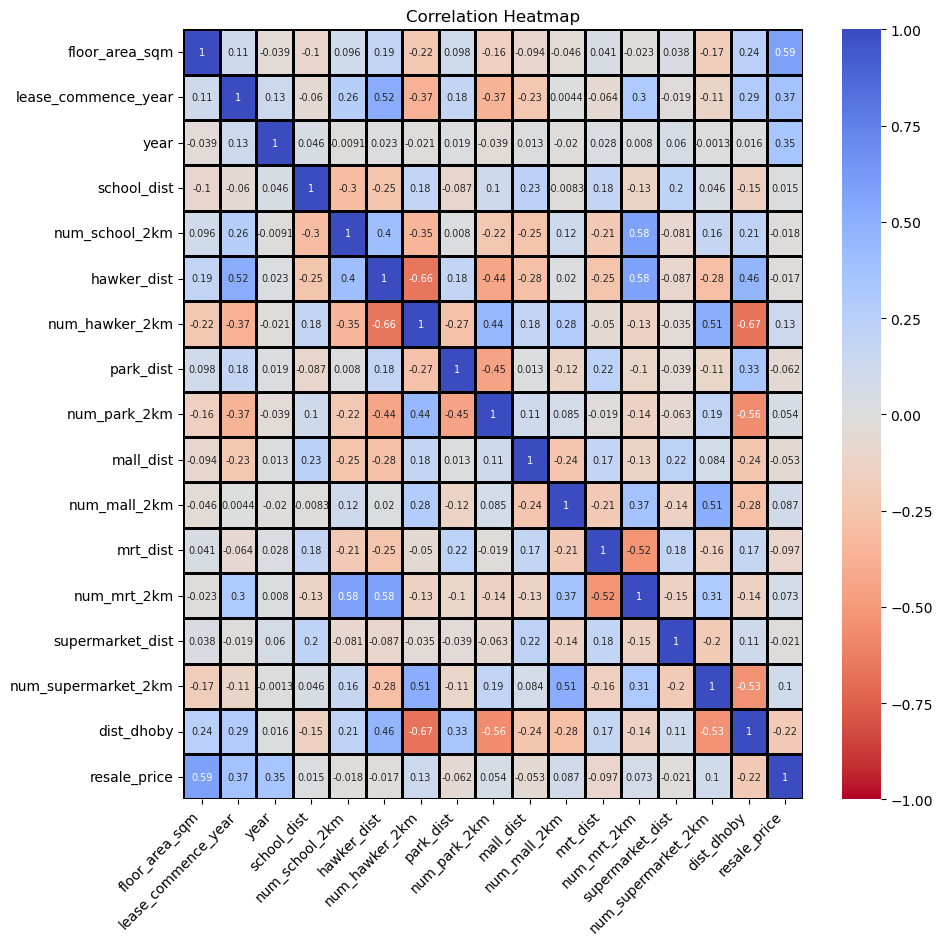

In [155]:
# Create the figure
fig = plt.figure(figsize=(10, 10))

# Create the heatmap
ax = sns.heatmap(df3.select_dtypes(include=['int32', 'int64', 'float64']).corr(), annot=True, fmt='.2g', 
                 vmin=-1, vmax=1, center=0, cmap='coolwarm_r', linecolor='black', linewidth=1, 
                 annot_kws={"size": 7})

# Adjust the rotation of x-axis labels
plt.xticks(rotation=45, ha='right')

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

# Conclusion for the Correlation Heatmap

### Resale Price:
* Floor Area (0.59): A larger floor area is strongly positively correlated with higher resale prices.
* Lease Commencement Year (0.37): Newer properties tend to have higher resale prices.
* Number of MRT Stations within 2 km (0.14): Proximity to more MRT stations has a slight positive impact on resale prices.
* Distance to Hawker Centers (-0.22): Properties closer to hawker centers tend to have higher resale prices.
* Distance to Dhoby Ghaut (-0.22): Being closer to Dhoby Ghaut station is associated with higher resale prices.

### Lease Commencement Year:
* Schools within 2 km (0.26): Newer properties are often located in areas with more schools.
* Parks within 2 km (0.44): Newer properties are also located near more parks.

### Distance Metrics:
* Distance to Hawker Centers (-0.66): Properties closer to hawker centers have more hawker centers within a 2 km radius.
* Distance to MRT Stations (-0.52): Properties closer to MRT stations have more MRT stations within a 2 km radius.
* Distance to Supermarkets (-0.53): Properties closer to supermarkets have more supermarkets within a 2 km radius.

### Overall Interpretation
* The heatmap provides a visual representation of the strength and direction of relationships between various factors and resale prices. Positive correlations indicate that factors such as larger floor area, newer lease commencement year, and proximity to amenities enhance property value.
*  Negative correlations highlight the significance of convenience, where properties closer to key amenities tend to have higher resale prices.
*  This analysis can help real estate stakeholders understand the key drivers of property value and prioritize features that enhance desirability and market value.



# 2.2 Data Formatting

From the empathy map, we can know various information of the location of the flat with respective proximity to certain location/amenities which will be essential for the buyer decision.

Therefore we incorporate the Location factor into the existing data sets to see the impact of the information to the resales flat.

The Singapore postal code files was extract from website('https://www.kaggle.com/datasets/mylee2009/singapore-postal-code-mapper/data').

In [161]:
#Loading the zipcode dataset and incorporate the blk_no with road_name information
#zip_data = pd.read_csv('sg_zipcode_mapper.csv', encoding='ISO-8859-1')
#zip_data['Blkst']=zip_data['blk_no']+" "+zip_data['road_name']
#display(zip_data.head())

In [162]:
# Incorporate the blk street information for merging with zip_data dataset
#hdb_data['Blkst']=hdb_data['block']+" "+hdb_data['street_name']
#hdb_data.head()

In [163]:
# Insert coordinate information from the SGZip datasets with the hdb data and drop non-essential information in SGZip dataset
#hdb_data_coor=hdb_data.merge(zip_data, left_on='Blkst', right_on='Blkst')
#hdb_data_coor=hdb_data_coor.drop(columns=['postal', 'searchval','blk_no','road_name','building','address','postal.1'])
#hdb_data_coor.info()

In [165]:
#dbmrt = pd.read_csv('mrt_lrt_data.csv')
#dbschool = pd.read_csv('school_coordinates.csv')
#dbmall = pd.read_csv('shoppingmall_coordinates_clean.csv')

In [170]:
#dbschool

In [172]:
# Identify the maximum count for each dataset.
#maxcountc=hdb_data_coor.count().max()
#maxcountm=dbmrt.count().max()


    
# Create functions to generate the distance between two coordinates 

#def dist_vect(lon1, lat1, lon2, lat2):
#    dlon = np.radians(lon2) - np.radians(lon1)
#    dlat = np.radians(lat2) - np.radians(lat1)

#    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
#    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
#    km = 6367 * c #6367 for distance in KM for miles use 3958
#    return km

# Scan through data for the nearest distance of the resales flat to the train,incorporate the new data on to column Neartrain
#for i in range (0,maxcountc):
#    Neartrain=100
#    for j in range(0,maxcountm):
#        dist = dist_vect(hdb_data_coor.loc[i,'longtitude'], hdb_data_coor.loc[i,'latitude'],dbmrt.loc[j,'Longitude'],dbmrt.loc[j,'Latitude'])
#        if dist < Neartrain:
#            Neartrain=dist
#        else:
#            Neartrain=Neartrain                                                               
#    hdb_data_coor.loc[i,'Neartrain']=Neartrain

In [174]:
#maxcounts=dbschool.count().max()
# Scan through data for the nearest distance of the resales flat to the school,incorporate the new data on to column Nearschool
#for i in range (0,maxcountc):
#    Nearschool=100
#    for j in range(0,maxcounts):
#        dist = dist_vect(hdb_data_coor.loc[i,'longtitude'], hdb_data_coor.loc[i,'latitude'],dbschool.loc[j,'LONGTITUDE'],dbschool.loc[j,'LATITUDE'])
#        if dist < Nearschool:
#            Nearschool=dist
#        else:
#            Nearschool=Nearschool                                                              
#    hdb_data_coor.loc[i,'Nearschool']=Nearschool
    

In [176]:
# Scan through data for the nearest distance of the resales flat to the mall,incorporate the new data on to column Nearmall
#maxcountm1=dbmall.count().max()
#for i in range (0,maxcountc):
#    Nearmall=100
#    for j in range(0,maxcountm1):
#        dist = dist_vect(hdb_data_coor.loc[i,'longtitude'], hdb_data_coor.loc[i,'latitude'],dbmall.loc[j,'LONGITUDE'],dbmall.loc[j,'LATITUDE'])
#        if dist < Nearmall:
#            Nearmall=dist
#        else:
#            Nearmall=Nearmall                                                              
#    hdb_data_coor.loc[i,'Nearmall']=Nearmall

In [178]:
#hdb_data_coor.head()

In [180]:
#hdb_data_coor.to_csv ('export_dataframe.csv', index = False, header=True)

In [182]:
hdb_data_coor = pd.read_csv('export_dataframe.csv')
hdb_data_coor.describe()

floor_area_sqm  lease_commence_year  remaining_lease  resale_price  \
count    23114.000000         23114.000000     23114.000000  2.311400e+04   
mean        96.851389          2006.660509        84.294627  5.207055e+05   
std         18.965330            11.665192        11.474330  1.456851e+05   
min         37.000000          1968.000000        44.000000  1.400000e+05   
25%         91.000000          2001.000000        79.000000  4.200000e+05   
50%         93.000000          2012.000000        89.000000  5.080000e+05   
75%        111.000000          2016.000000        93.000000  6.050000e+05   
max        187.000000          2020.000000        96.000000  1.250000e+06   

               year      latitude    longtitude     Neartrain    Nearschool  \
count  23114.000000  23114.000000  23114.000000  23114.000000  23114.000000   
mean    2020.905166      1.391565    103.873496      0.192861      0.178431   
std        2.187073      0.036937      0.046490      0.158514      0.133144   
min     2017.000000      1.270380    103.744790      0.009117      0.019297   
25%     2019.000000      1.384397    103.863341      0.091050      0.102629   
50%     2021.000000      1.395322    103.894604      0.143328      0.151104   
75%     2023.000000      1.404997    103.901076      0.235363      0.208817   
max     2024.000000      1.457071    103.959643      0.884309      0.878762   

           Nearmall  
count  23114.000000  
mean       0.287125  
std        0.174368  
min        0.000406  
25%        0.164605  
50%        0.252740  
75%        0.365834  
max        1.030105

From the statistical data, we know that HDB flat are relatively near to MRT/LRT stations, schools and malls. The mean distance from the MRT/LRT station to the resale flat is 193m. The average distance from the school is 178m and from the mall is 287m.

In [185]:
hdb_data_coor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23114 entries, 0 to 23113
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                23114 non-null  object 
 1   town                 23114 non-null  object 
 2   flat_type            23114 non-null  object 
 3   block                23114 non-null  object 
 4   street_name          23114 non-null  object 
 5   storey_range         23114 non-null  object 
 6   floor_area_sqm       23114 non-null  float64
 7   flat_model           23114 non-null  object 
 8   lease_commence_year  23114 non-null  int64  
 9   remaining_lease      23114 non-null  int64  
 10  resale_price         23114 non-null  float64
 11  year                 23114 non-null  int64  
 12  Blkst                23114 non-null  object 
 13  latitude             23114 non-null  float64
 14  longtitude           23114 non-null  float64
 15  Neartrain            23114 non-null 

In [187]:
# Distribute of HDB data through the heat map
import folium
from folium.plugins import HeatMap

# Create a map
m = folium.Map(location=[1.44255, 103.79580], zoom_start=11)

# Add heatmap
heat_data = [[row['latitude'], row['longtitude']] for index, row in hdb_data_coor.iterrows()]
HeatMap(heat_data).add_to(m)
m.save("heatmap.html")
display(m)

In [191]:
dbmrt = pd.read_csv('mrt_lrt_data.csv')
dbschool = pd.read_csv('school_coordinates.csv')
dbmall = pd.read_csv('shoppingmall_coordinates_clean.csv')

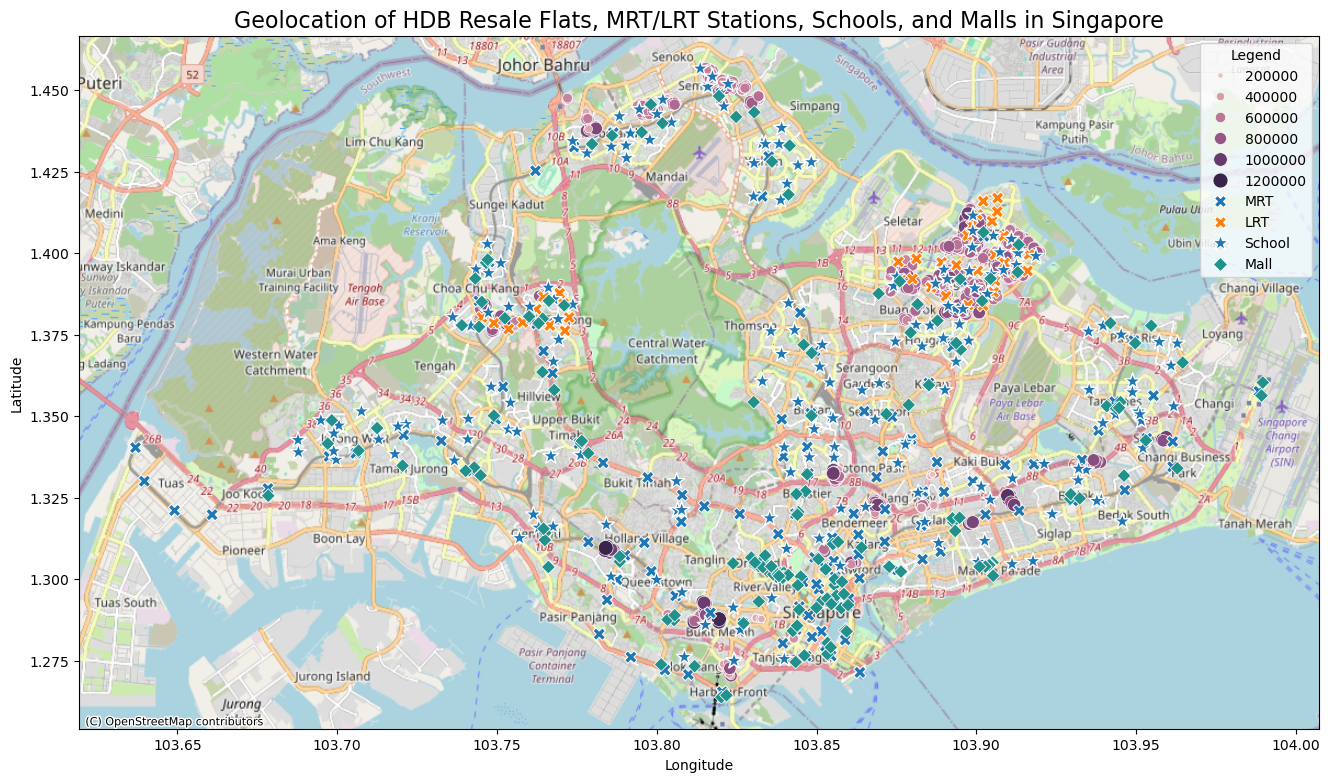

In [193]:
import contextily as ctx

# Set figure size
plt.figure(figsize=(16, 9))

# Create scatter plots
scatter_hdb = sns.scatterplot(x=hdb_data_coor.longtitude, y=hdb_data_coor.latitude, hue=hdb_data_coor.resale_price, size=hdb_data_coor.resale_price, sizes=(10, 120), data=hdb_data_coor, legend=True)
scatter_mrt = sns.scatterplot(x=dbmrt.Longitude, y=dbmrt.Latitude, hue=dbmrt.type, data=dbmrt, marker="X", s=80, legend=True)
scatter_school = sns.scatterplot(x=dbschool.LONGITUDE, y=dbschool.LATITUDE, hue=dbschool.type, data=dbschool, marker="*", s=150, legend=True)
scatter_mall = sns.scatterplot(x=dbmall.LONGITUDE, y=dbmall.LATITUDE, hue=dbmall.type, data=dbmall, marker="D", s=50, legend=True, palette="viridis")

# Adding Singapore map as a background
ax = plt.gca()  # Get the current axis
ctx.add_basemap(ax, crs="EPSG:4326", 
                source=ctx.providers.OpenStreetMap.Mapnik,  # Replace with OpenStreetMap
                zoom=12
)

# Rename legend
scatter_mall.legend(title='Legend')

# Set plot title
plt.title("Geolocation of HDB Resale Flats, MRT/LRT Stations, Schools, and Malls in Singapore", fontsize=16)

# Set axis labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


# Correlation between Resale Price and Consumer Price Index (CPI)

In [197]:
# Import cpi Data
cpi = pd.read_csv('cpi.csv')

# Data Formatting
cpi['month'] = pd.to_datetime(cpi['month'], format='%Y %b') # to datetime
prices_cpi = hdb_data.merge(cpi, on='month', how='left') 

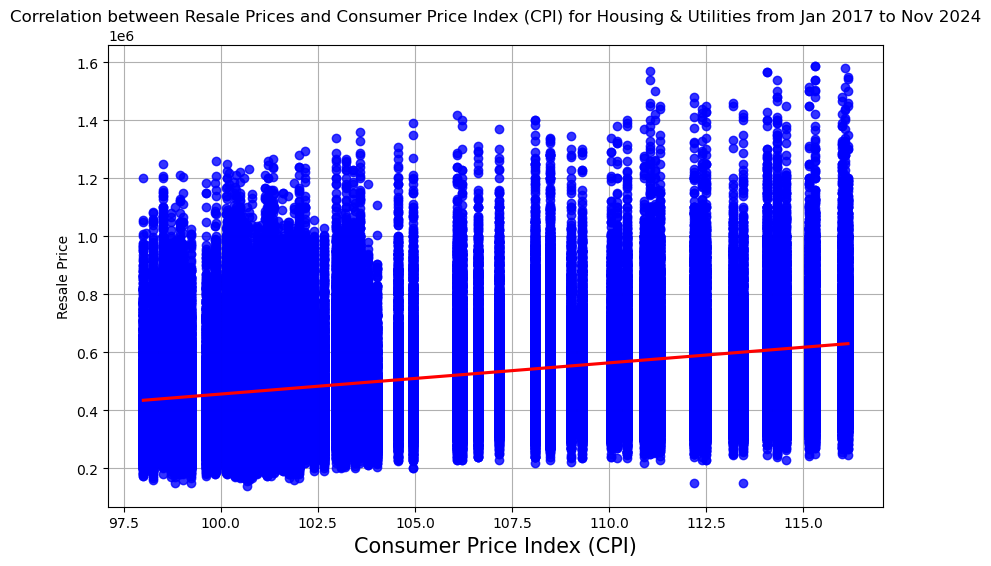

Pearson Coefficient: 0.3304


In [199]:
# Calculate the correlation coefficient
correlation = prices_cpi['resale_price'].corr(prices_cpi['cpi'])

# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='cpi', y='resale_price', data=prices_cpi, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Consumer Price Index (CPI)', fontsize = 15)
plt.ylabel('Resale Price')
plt.title('Correlation between Resale Prices and Consumer Price Index (CPI) for Housing & Utilities from Jan 2017 to Nov 2024')
plt.grid(True)
plt.show()
formatted_pearson_coef = format(correlation, '.4f')
print(f'Pearson Coefficient: {formatted_pearson_coef}')


# Conclusion of Correlation between Resale Prices and Consumer Price Index (CPI):
Having a Pearson Coefficient of 0.3304 indicates that there is a moderate positive linear relationship for the two variables. The Counsumer Price Index (CPI) does not affect much on the resales prices.

# Data Modelling:

In [203]:
# Upload the libraries for modelling
import sklearn
import sklearn.ensemble
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression     # Linear Regression
from sklearn.ensemble import RandomForestRegressor    # Random Forest Regression
from sklearn.tree import DecisionTreeRegressor        # Decision Tree Regression
from sklearn.metrics import mean_absolute_error, r2_score

# Linear Regression

In [206]:
# Define features and target variable for Linear Regression
X = hdb_data[["floor_area_sqm"]]    # Independent variable
y = hdb_data["resale_price"]        # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23) #👉 Datasets split into 80% training and 20% testing.

In [208]:
lr = LinearRegression()
# Train the model
lr.fit(X_train, y_train)

LinearRegression()

#### Random Forest and Decision Tree Regression - no categorical features

In [211]:
y_data=np.array(list(hdb_data["resale_price"])).reshape(-1,1)
filtered_data=hdb_data.drop(columns=['month','town','flat_type','block','street_name','storey_range','flat_model'])

nocat_data_y=y_data
nocat_data_X=filtered_data.drop(columns=['resale_price'])

nocat_X_train, nocat_X_test, nocat_y_train, nocat_y_test = train_test_split(nocat_data_X, nocat_data_y, test_size=0.2, random_state=23)

In [213]:
# Define the pipeline for Random Forest
nocat_rf_pipeline = Pipeline([('std_scaler', StandardScaler()), ('randfor_reg', RandomForestRegressor(n_estimators=100))])

# Fit the pipeline to the training data
nocat_rf_pipeline.fit(nocat_X_train, nocat_y_train.ravel())  # Use .ravel() to reshape y_train

print("Pipeline fitted successfully for Random Forest Regression.")

Pipeline fitted successfully for Random Forest Regression.


In [215]:
# Define the pipeline for Decision Tree
nocat_dtr_pipeline = Pipeline([('std_scaler', StandardScaler()), ('dtr_reg', DecisionTreeRegressor())])

# Train the model
nocat_dtr_pipeline.fit(nocat_X_train, nocat_y_train.ravel())

print("Pipeline fitted successfully for Decision Tree Regression.")

Pipeline fitted successfully for Decision Tree Regression.


#### Random Forest and Decision Tree Regression - categorical features

In [218]:
pop_data=hdb_data.drop(columns=['month','block','street_name'])
pop_data['town']=pd.Categorical(hdb_data['town'],categories=['ANG MO KIO','BEDOK','BISHAN','BUKIT BATOK','BUKIT MERAH','BUKIT PANJANG','BUKIT TIMAH','CENTRAL AREA','CHOA CHU KANG','CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST','KALLANG/WHAMPOA','MARINE PARADE', 'PASIR RIS', 'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN'],ordered=False)
pop_data['storey_range']=pd.Categorical(hdb_data['storey_range'],categories=['01 TO 03','04 TO 06','07 TO 09','10 TO 12','13 TO 15','16 TO 18','19 TO 21','22 TO 24','25 TO 27','28 TO 30','31 TO 33', '34 TO 36','37 TO 39','40 TO 42','43 TO 45','46 TO 48','49 TO 51'],ordered=True)
pop_data['flat_type']=pd.Categorical(hdb_data['flat_type'],categories=['1 ROOM','2 ROOM','3 ROOM','4 ROOM','5 ROOM','EXECUTIVE','MULTI-GENERATION'],ordered=False)
pop_data['flat_model']=pd.Categorical(hdb_data['flat_model'],categories=['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment', 'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2', 'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette', 'Multi Generation', 'Premium Apartment Loft', '2-room'],ordered=False)

pop_data=pd.get_dummies(pop_data)

In [220]:
cat_y=y_data
cat_x=pop_data.drop(columns=['resale_price'])

cat_X_train, cat_X_test, cat_y_train, cat_y_test = train_test_split(cat_x, cat_y, test_size=0.2, random_state=23) #👉 Datasets split into 80% training and 20% testing.

In [222]:
rf_pipeline = Pipeline([('std_scaler', StandardScaler()), ('rf_reg', RandomForestRegressor(n_estimators=100))])
rf_pipeline.fit(cat_X_train, cat_y_train.ravel())   # Use .ravel() to reshape y_train
print("Pipeline fitted successfully for Random Forest Regression.")

Pipeline fitted successfully for Random Forest Regression.


In [224]:
dtr_pipeline = Pipeline([('std_scaler', StandardScaler()), ('dtr_reg', DecisionTreeRegressor())])
dtr_pipeline.fit(cat_X_train, cat_y_train.ravel())   # Use .ravel() to reshape y_train
print("Pipeline fitted successfully for Decision Tree Regression.")

Pipeline fitted successfully for Decision Tree Regression.


# Testing Data Models

In [226]:
# Linear Regression score
y_pred = lr.predict(X_test) 
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²) score for Linear Regression: {r2:.4f}')

#Random Forest Regressor - no categorical features score
nocat_rf_pred = nocat_rf_pipeline.predict(nocat_X_test)
r2 = r2_score(nocat_y_test, nocat_rf_pred)
print(f'R-squared (R²) score for Random Forest Regression without categorical features: {r2:.4f}')

#Decision Tree Regressor - no categorical features score
nocat_dtr_pred = nocat_dtr_pipeline.predict(nocat_X_test)
r2 = r2_score(nocat_y_test, nocat_dtr_pred)
print(f'R-squared (R²) score for Decision Tree Regression without categorical features: {r2:.4f}')


#Random Forest Regressor with categorical features score
rf_pred = rf_pipeline.predict(cat_X_test)
r2 = r2_score(cat_y_test, rf_pred)
print(f'R-squared (R²) score for Random Forest Regression with categorical features: {r2:.4f}')

#Decision Tree Regressor with categorical features score
dtr_pred = dtr_pipeline.predict(cat_X_test)
r2 = r2_score(cat_y_test, dtr_pred)
print(f'R-squared (R²) score for Decision Tree Regression with categorical features: {r2:.4f}')

R-squared (R²) score for Linear Regression: 0.3422
R-squared (R²) score for Random Forest Regression without categorical features: 0.7548
R-squared (R²) score for Decision Tree Regression without categorical features: 0.7431
R-squared (R²) score for Random Forest Regression with categorical features: 0.9577
R-squared (R²) score for Decision Tree Regression with categorical features: 0.9394


In [228]:
# Calculate Mean Absolute Error
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for Linear Regression: {mae:.4f}')

# Calculate Mean Absolute Error for RFR no category
nocat_rf_pred = nocat_rf_pipeline.predict(nocat_X_test)
mae = mean_absolute_error(nocat_y_test, nocat_rf_pred)
print(f'Mean Absolute Error for Random Forest without category: {mae:.4f}')

# Calculate Mean Absolute Error for DTR no category
nocat_dtr_pred = nocat_dtr_pipeline.predict(nocat_X_test)
mae = mean_absolute_error(nocat_y_test, nocat_dtr_pred)
print(f'Mean Absolute Error for Decision Tree without category: {mae:.4f}')


# Calculate Mean Absolute Error for RFR with category
cat_rf_pred = rf_pipeline.predict(cat_X_test)
mae = mean_absolute_error(cat_y_test, cat_rf_pred)
print(f'Mean Absolute Error for Random Forest with categories: {mae:.4f}')

# Calculate Mean Absolute Error for DTR with category
cat_dtr_pred = dtr_pipeline.predict(cat_X_test)
mae = mean_absolute_error(cat_y_test, cat_dtr_pred)
print(f'Mean Absolute Error for Decision Tree with categories: {mae:.4f}')

Mean Absolute Error for Linear Regression: 108198.9295
Mean Absolute Error for Random Forest without category: 59384.5874
Mean Absolute Error for Decision Tree without category: 60305.3599
Mean Absolute Error for Random Forest with categories: 25423.0038
Mean Absolute Error for Decision Tree with categories: 29446.8491


# Predictions

- Predictions using the trained models

In [230]:
# Extract a HDB flat from the data for prediction
act_label = hdb_data.iloc[[180067]]
act_label = act_label.drop(columns=['month','block','street_name', 'flat_model'])
act_label.head()

town flat_type storey_range  floor_area_sqm  lease_commence_year  \
180067  SENGKANG    4 ROOM     16 TO 18            92.0                 2008   

        remaining_lease  resale_price  year  
180067               83      710000.0  2024

In [232]:
hypond=cat_x.iloc[[180067]]
hypo=pd.DataFrame(hypond)

nocat_hypond={'floor_area_sqm':[92],'lease_commence_year':[2008],'remaining_lease':[83], 'year':[2024]}   # input the values for prediction
nocat_hypo=pd.DataFrame(nocat_hypond)

nocat_rf_pred=float(nocat_rf_pipeline.predict(nocat_hypo)[0])
rf_pred=float(rf_pipeline.predict(hypo)[0])
nocat_dtr_pred=float(nocat_dtr_pipeline.predict(nocat_hypo)[0]) 
dtr_pred=float(dtr_pipeline.predict(hypo)[0])

In [234]:
# Predicting with valid feature names
actual_size = int(act_label['floor_area_sqm'].iloc[0])  
actual_price = float(act_label['resale_price'].iloc[0])  

predict_df = pd.DataFrame({'floor_area_sqm': [actual_size]})
predict_price = lr.predict(predict_df)[0]

print('Actual resale price - ${:.2f}'.format(actual_price))
print('Prediction 1: Linear Regression - ${:.2f}'.format(predict_price))
print('Prediction 2: Random forest regression without categorical features - ${:.2f}'.format(nocat_rf_pred))
print('Prediction 3: Decision Tree regression without categorical features - ${:.2f}'.format(nocat_dtr_pred))
print('Prediction 4: Random forest regression with categorical features - ${:.2f}'.format(rf_pred))
print('Prediction 5: Decision Tree regression with categorical features - ${:.2f}'.format(dtr_pred))

Actual resale price - $710000.00
Prediction 1: Linear Regression - $486417.02
Prediction 2: Random forest regression without categorical features - $669515.29
Prediction 3: Decision Tree regression without categorical features - $671598.67
Prediction 4: Random forest regression with categorical features - $701478.07
Prediction 5: Decision Tree regression with categorical features - $705500.00


## Reference:
> https://www.kaggle.com/code/teyang/drivers-of-hdb-resale-price-and-prediction